In [1]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    def value(self):
        return np.array([self.x,self.y]) 
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [14]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [15]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))

    progress = []
    best_progress = []
    best_route_overall = pop[rankRoutes(pop)[0][0]]
    best_gene_dist = 1 / rankRoutes(pop)[0][1]
    
    progress.append(1 / rankRoutes(pop)[0][1])
    best_progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        if (1 / rankRoutes(pop)[0][1]) < best_gene_dist : 
          best_gene_dist = (1 / rankRoutes(pop)[0][1])
          best_route_overall = pop[rankRoutes(pop)[0][0]]
          
        
        best_progress.append(best_gene_dist)
        progress.append(1 / rankRoutes(pop)[0][1])

        
        
        print('iteration: ' + str(i+1) + ' current best dist: ' + str(1 / rankRoutes(pop)[0][1]) + ' overall_best_dist: ' + str(best_gene_dist)) 
        
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    
    plt.plot(best_progress)
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return bestRoute,best_route_overall

In [16]:
def make_cities_array(gene):
  city_array = np.zeros([len(gene),2])
  j=0
  for i in gene:
    city_array[j] = i.value()
    j+=1
  return city_array

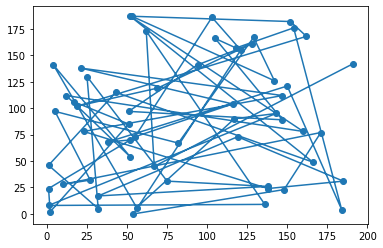

In [17]:
cityList = []

for i in range(0,60):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
    
city_array = make_cities_array(cityList)
plt.scatter(city_array[:,0],city_array[:,1])
plt.plot(city_array[:,0],city_array[:,1])

Initial distance: 5789.599332679301
iteration: 1 current best dist: 5789.599332679301 overall_best_dist: 5789.599332679301
iteration: 2 current best dist: 5733.219874959384 overall_best_dist: 5733.219874959384
iteration: 3 current best dist: 5616.84783093318 overall_best_dist: 5616.84783093318
iteration: 4 current best dist: 5616.84783093318 overall_best_dist: 5616.84783093318
iteration: 5 current best dist: 5616.84783093318 overall_best_dist: 5616.84783093318
iteration: 6 current best dist: 5529.693899239169 overall_best_dist: 5529.693899239169
iteration: 7 current best dist: 5480.108867112113 overall_best_dist: 5480.108867112113
iteration: 8 current best dist: 5281.3650459324235 overall_best_dist: 5281.3650459324235
iteration: 9 current best dist: 5247.351441603282 overall_best_dist: 5247.351441603282
iteration: 10 current best dist: 5247.351441603282 overall_best_dist: 5247.351441603282
iteration: 11 current best dist: 5247.351441603282 overall_best_dist: 5247.351441603282
iteration

iteration: 99 current best dist: 3562.2425205041823 overall_best_dist: 3562.2425205041823
iteration: 100 current best dist: 3562.2425205041823 overall_best_dist: 3562.2425205041823
iteration: 101 current best dist: 3562.2425205041823 overall_best_dist: 3562.2425205041823
iteration: 102 current best dist: 3562.2425205041823 overall_best_dist: 3562.2425205041823
iteration: 103 current best dist: 3544.432998523016 overall_best_dist: 3544.432998523016
iteration: 104 current best dist: 3544.432998523016 overall_best_dist: 3544.432998523016
iteration: 105 current best dist: 3544.432998523016 overall_best_dist: 3544.432998523016
iteration: 106 current best dist: 3496.84143011176 overall_best_dist: 3496.84143011176
iteration: 107 current best dist: 3496.84143011176 overall_best_dist: 3496.84143011176
iteration: 108 current best dist: 3496.84143011176 overall_best_dist: 3496.84143011176
iteration: 109 current best dist: 3496.84143011176 overall_best_dist: 3496.84143011176
iteration: 110 current

iteration: 200 current best dist: 2971.7153602598873 overall_best_dist: 2971.7153602598873
iteration: 201 current best dist: 2971.7153602598873 overall_best_dist: 2971.7153602598873
iteration: 202 current best dist: 2971.7153602598873 overall_best_dist: 2971.7153602598873
iteration: 203 current best dist: 2961.9098734592144 overall_best_dist: 2961.9098734592144
iteration: 204 current best dist: 2961.9098734592144 overall_best_dist: 2961.9098734592144
iteration: 205 current best dist: 2922.9923938741767 overall_best_dist: 2922.9923938741767
iteration: 206 current best dist: 2922.9923938741767 overall_best_dist: 2922.9923938741767
iteration: 207 current best dist: 2922.9923938741767 overall_best_dist: 2922.9923938741767
iteration: 208 current best dist: 2903.0033154575913 overall_best_dist: 2903.0033154575913
iteration: 209 current best dist: 2903.0033154575913 overall_best_dist: 2903.0033154575913
iteration: 210 current best dist: 2903.0033154575913 overall_best_dist: 2903.0033154575913

iteration: 292 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 293 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 294 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 295 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 296 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 297 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 298 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 299 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 300 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 301 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 302 current best dist: 2794.487802928966 overall_best_dist: 2773.108915347133
iteration: 303 curren

iteration: 404 current best dist: 2546.31012171617 overall_best_dist: 2535.579823329835
iteration: 405 current best dist: 2546.31012171617 overall_best_dist: 2535.579823329835
iteration: 406 current best dist: 2546.31012171617 overall_best_dist: 2535.579823329835
iteration: 407 current best dist: 2522.201793732219 overall_best_dist: 2522.201793732219
iteration: 408 current best dist: 2522.201793732219 overall_best_dist: 2522.201793732219
iteration: 409 current best dist: 2522.201793732219 overall_best_dist: 2522.201793732219
iteration: 410 current best dist: 2522.201793732219 overall_best_dist: 2522.201793732219
iteration: 411 current best dist: 2522.201793732219 overall_best_dist: 2522.201793732219
iteration: 412 current best dist: 2522.201793732219 overall_best_dist: 2522.201793732219
iteration: 413 current best dist: 2522.201793732219 overall_best_dist: 2522.201793732219
iteration: 414 current best dist: 2522.201793732219 overall_best_dist: 2522.201793732219
iteration: 415 current b

iteration: 515 current best dist: 2397.689675760038 overall_best_dist: 2397.689675760038
iteration: 516 current best dist: 2397.689675760038 overall_best_dist: 2397.689675760038
iteration: 517 current best dist: 2364.042709146617 overall_best_dist: 2364.042709146617
iteration: 518 current best dist: 2329.0146614596706 overall_best_dist: 2329.0146614596706
iteration: 519 current best dist: 2329.0146614596706 overall_best_dist: 2329.0146614596706
iteration: 520 current best dist: 2334.368514736141 overall_best_dist: 2329.0146614596706
iteration: 521 current best dist: 2334.368514736141 overall_best_dist: 2329.0146614596706
iteration: 522 current best dist: 2334.368514736141 overall_best_dist: 2329.0146614596706
iteration: 523 current best dist: 2334.368514736141 overall_best_dist: 2329.0146614596706
iteration: 524 current best dist: 2334.368514736141 overall_best_dist: 2329.0146614596706
iteration: 525 current best dist: 2334.368514736141 overall_best_dist: 2329.0146614596706
iteration: 

iteration: 608 current best dist: 2185.963836300527 overall_best_dist: 2185.963836300527
iteration: 609 current best dist: 2185.963836300527 overall_best_dist: 2185.963836300527
iteration: 610 current best dist: 2185.963836300527 overall_best_dist: 2185.963836300527
iteration: 611 current best dist: 2185.963836300527 overall_best_dist: 2185.963836300527
iteration: 612 current best dist: 2185.963836300527 overall_best_dist: 2185.963836300527
iteration: 613 current best dist: 2237.1864796713817 overall_best_dist: 2185.963836300527
iteration: 614 current best dist: 2237.1864796713817 overall_best_dist: 2185.963836300527
iteration: 615 current best dist: 2237.1864796713817 overall_best_dist: 2185.963836300527
iteration: 616 current best dist: 2237.1864796713817 overall_best_dist: 2185.963836300527
iteration: 617 current best dist: 2237.1864796713817 overall_best_dist: 2185.963836300527
iteration: 618 current best dist: 2237.1864796713817 overall_best_dist: 2185.963836300527
iteration: 619 

iteration: 720 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 721 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 722 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 723 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 724 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 725 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 726 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 727 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 728 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 729 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 730 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605

iteration: 824 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 825 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 826 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 827 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 828 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 829 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 830 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 831 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 832 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 833 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 834 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605

iteration: 930 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 931 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 932 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 933 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 934 current best dist: 2198.6279064577902 overall_best_dist: 2126.4418991057605
iteration: 935 current best dist: 2198.3674625390854 overall_best_dist: 2126.4418991057605
iteration: 936 current best dist: 2198.3674625390854 overall_best_dist: 2126.4418991057605
iteration: 937 current best dist: 2198.3674625390854 overall_best_dist: 2126.4418991057605
iteration: 938 current best dist: 2198.3674625390854 overall_best_dist: 2126.4418991057605
iteration: 939 current best dist: 2198.3674625390854 overall_best_dist: 2126.4418991057605
iteration: 940 current best dist: 2198.3674625390854 overall_best_dist: 2126.4418991057605

iteration: 1022 current best dist: 2190.7528699137074 overall_best_dist: 2126.4418991057605
iteration: 1023 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1024 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1025 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1026 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1027 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1028 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1029 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1030 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1031 current best dist: 2155.7272132140165 overall_best_dist: 2126.4418991057605
iteration: 1032 current best dist: 2155.7272132140165 overall_best_dist: 2126.44

iteration: 1120 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1121 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1122 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1123 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1124 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1125 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1126 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1127 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1128 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1129 current best dist: 2135.4060348689322 overall_best_dist: 2126.4418991057605
iteration: 1130 current best dist: 2135.4060348689322 overall_best_dist: 2126.44

iteration: 1212 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1213 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1214 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1215 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1216 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1217 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1218 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1219 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1220 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1221 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration: 1222 current best dist: 2071.094928789005 overall_best_dist: 2071.094928789005
iteration:

iteration: 1324 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1325 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1326 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1327 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1328 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1329 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1330 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1331 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1332 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1333 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration: 1334 current best dist: 2050.325149762386 overall_best_dist: 2050.325149762386
iteration:

iteration: 1416 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1417 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1418 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1419 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1420 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1421 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1422 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1423 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1424 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1425 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1426 current best dist: 2034.4729375516824 overall_best_dist: 2034.47

iteration: 1513 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1514 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1515 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1516 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1517 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1518 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1519 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1520 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1521 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1522 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1523 current best dist: 2034.4729375516824 overall_best_dist: 2034.47

iteration: 1604 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1605 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1606 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1607 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1608 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1609 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1610 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1611 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1612 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1613 current best dist: 2034.4729375516824 overall_best_dist: 2034.4729375516824
iteration: 1614 current best dist: 2034.4729375516824 overall_best_dist: 2034.47

iteration: 1701 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1702 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1703 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1704 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1705 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1706 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1707 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1708 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1709 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1710 current best dist: 2254.4341859823903 overall_best_dist: 2034.4729375516824
iteration: 1711 current best dist: 2254.4341859823903 overall_best_dist: 2034.47

iteration: 1793 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1794 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1795 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1796 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1797 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1798 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1799 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1800 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1801 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1802 current best dist: 2189.4712472097294 overall_best_dist: 2034.4729375516824
iteration: 1803 current best dist: 2189.4712472097294 overall_best_dist: 2034.47

iteration: 1887 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1888 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1889 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1890 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1891 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1892 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1893 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1894 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1895 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1896 current best dist: 2170.2655438333504 overall_best_dist: 2034.4729375516824
iteration: 1897 current best dist: 2170.2655438333504 overall_best_dist: 2034.47

iteration: 1979 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1980 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1981 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1982 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1983 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1984 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1985 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1986 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1987 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1988 current best dist: 2085.1361025696574 overall_best_dist: 2034.4729375516824
iteration: 1989 current best dist: 2085.1361025696574 overall_best_dist: 2034.47

iteration: 2072 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2073 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2074 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2075 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2076 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2077 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2078 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2079 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2080 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2081 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2082 current best dist: 2069.7310396355706 overall_best_dist: 2034.47

iteration: 2180 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2181 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2182 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2183 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2184 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2185 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2186 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2187 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2188 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2189 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2190 current best dist: 2069.7310396355706 overall_best_dist: 2034.47

iteration: 2270 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2271 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2272 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2273 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2274 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2275 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2276 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2277 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2278 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2279 current best dist: 2069.7310396355706 overall_best_dist: 2034.4729375516824
iteration: 2280 current best dist: 2069.7310396355706 overall_best_dist: 2034.47

iteration: 2374 current best dist: 2221.9421283915335 overall_best_dist: 2034.4729375516824
iteration: 2375 current best dist: 2221.9421283915335 overall_best_dist: 2034.4729375516824
iteration: 2376 current best dist: 2221.9421283915335 overall_best_dist: 2034.4729375516824
iteration: 2377 current best dist: 2221.9421283915335 overall_best_dist: 2034.4729375516824
iteration: 2378 current best dist: 2221.9421283915335 overall_best_dist: 2034.4729375516824
iteration: 2379 current best dist: 2221.9421283915335 overall_best_dist: 2034.4729375516824
iteration: 2380 current best dist: 2199.5140372509754 overall_best_dist: 2034.4729375516824
iteration: 2381 current best dist: 2199.5140372509754 overall_best_dist: 2034.4729375516824
iteration: 2382 current best dist: 2199.5140372509754 overall_best_dist: 2034.4729375516824
iteration: 2383 current best dist: 2199.5140372509754 overall_best_dist: 2034.4729375516824
iteration: 2384 current best dist: 2199.5140372509754 overall_best_dist: 2034.47

iteration: 2466 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2467 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2468 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2469 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2470 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2471 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2472 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2473 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2474 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2475 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824
iteration: 2476 current best dist: 2227.574686910613 overall_best_dist: 2034.4729375516824

iteration: 2580 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2581 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2582 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2583 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2584 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2585 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2586 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2587 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2588 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2589 current best dist: 2246.1113019896397 overall_best_dist: 2034.4729375516824
iteration: 2590 current best dist: 2246.1113019896397 overall_best_dist: 2034.47

iteration: 2690 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2691 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2692 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2693 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2694 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2695 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2696 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2697 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2698 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2699 current best dist: 2222.4091082190344 overall_best_dist: 2034.4729375516824
iteration: 2700 current best dist: 2129.137399547036 overall_best_dist: 2034.472

iteration: 2782 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2783 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2784 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2785 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2786 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2787 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2788 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2789 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2790 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2791 current best dist: 1965.0702077631488 overall_best_dist: 1965.0702077631488
iteration: 2792 current best dist: 1965.0702077631488 overall_best_dist: 1965.07

iteration: 2874 current best dist: 1926.8180814370603 overall_best_dist: 1926.8180814370603
iteration: 2875 current best dist: 1926.8180814370603 overall_best_dist: 1926.8180814370603
iteration: 2876 current best dist: 1926.8180814370603 overall_best_dist: 1926.8180814370603
iteration: 2877 current best dist: 1926.8180814370603 overall_best_dist: 1926.8180814370603
iteration: 2878 current best dist: 1926.8180814370603 overall_best_dist: 1926.8180814370603
iteration: 2879 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734
iteration: 2880 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734
iteration: 2881 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734
iteration: 2882 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734
iteration: 2883 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734
iteration: 2884 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734


iteration: 2965 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734
iteration: 2966 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734
iteration: 2967 current best dist: 1889.456300525734 overall_best_dist: 1889.456300525734
iteration: 2968 current best dist: 1861.4817109714734 overall_best_dist: 1861.4817109714734
iteration: 2969 current best dist: 1861.4817109714734 overall_best_dist: 1861.4817109714734
iteration: 2970 current best dist: 1861.4817109714734 overall_best_dist: 1861.4817109714734
iteration: 2971 current best dist: 1861.4817109714734 overall_best_dist: 1861.4817109714734
iteration: 2972 current best dist: 1861.4817109714734 overall_best_dist: 1861.4817109714734
iteration: 2973 current best dist: 1861.4817109714734 overall_best_dist: 1861.4817109714734
iteration: 2974 current best dist: 1861.4817109714734 overall_best_dist: 1861.4817109714734
iteration: 2975 current best dist: 1861.4817109714734 overall_best_dist: 1861.48171097

iteration: 3077 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3078 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3079 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3080 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3081 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3082 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3083 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3084 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3085 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3086 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645
iteration: 3087 current best dist: 1839.788358825431 overall_best_dist: 1775.8633613352645

iteration: 3173 current best dist: 1854.828419464908 overall_best_dist: 1775.8633613352645
iteration: 3174 current best dist: 1854.828419464908 overall_best_dist: 1775.8633613352645
iteration: 3175 current best dist: 1854.828419464908 overall_best_dist: 1775.8633613352645
iteration: 3176 current best dist: 1854.828419464908 overall_best_dist: 1775.8633613352645
iteration: 3177 current best dist: 1854.828419464908 overall_best_dist: 1775.8633613352645
iteration: 3178 current best dist: 1854.828419464908 overall_best_dist: 1775.8633613352645
iteration: 3179 current best dist: 1854.828419464908 overall_best_dist: 1775.8633613352645
iteration: 3180 current best dist: 1850.4255949241242 overall_best_dist: 1775.8633613352645
iteration: 3181 current best dist: 1850.4255949241242 overall_best_dist: 1775.8633613352645
iteration: 3182 current best dist: 1850.4255949241242 overall_best_dist: 1775.8633613352645
iteration: 3183 current best dist: 1850.4255949241242 overall_best_dist: 1775.863361335

iteration: 3264 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3265 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3266 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3267 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3268 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3269 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3270 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3271 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3272 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3273 current best dist: 1800.9702533592979 overall_best_dist: 1775.8633613352645
iteration: 3274 current best dist: 1800.9702533592979 overall_best_dist: 1775.86

iteration: 3361 current best dist: 1856.5542396232352 overall_best_dist: 1775.8633613352645
iteration: 3362 current best dist: 1856.5542396232352 overall_best_dist: 1775.8633613352645
iteration: 3363 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3364 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3365 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3366 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3367 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3368 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3369 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3370 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3371 current best dist: 1758.5253061111894 overall_best_dist: 1758.52

iteration: 3453 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3454 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3455 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3456 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3457 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3458 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3459 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3460 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3461 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3462 current best dist: 1758.5253061111894 overall_best_dist: 1758.5253061111894
iteration: 3463 current best dist: 1758.5253061111894 overall_best_dist: 1758.52

iteration: 3545 current best dist: 1756.317435746511 overall_best_dist: 1756.317435746511
iteration: 3546 current best dist: 1756.317435746511 overall_best_dist: 1756.317435746511
iteration: 3547 current best dist: 1756.317435746511 overall_best_dist: 1756.317435746511
iteration: 3548 current best dist: 1756.317435746511 overall_best_dist: 1756.317435746511
iteration: 3549 current best dist: 1756.317435746511 overall_best_dist: 1756.317435746511
iteration: 3550 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3551 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3552 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3553 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3554 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3555 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration:

iteration: 3658 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3659 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3660 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3661 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3662 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3663 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3664 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3665 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3666 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3667 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration: 3668 current best dist: 1853.720498360186 overall_best_dist: 1756.317435746511
iteration:

iteration: 3753 current best dist: 1809.7700847235556 overall_best_dist: 1756.317435746511
iteration: 3754 current best dist: 1809.7700847235556 overall_best_dist: 1756.317435746511
iteration: 3755 current best dist: 1809.7700847235556 overall_best_dist: 1756.317435746511
iteration: 3756 current best dist: 1809.7700847235556 overall_best_dist: 1756.317435746511
iteration: 3757 current best dist: 1809.7700847235556 overall_best_dist: 1756.317435746511
iteration: 3758 current best dist: 1809.7700847235556 overall_best_dist: 1756.317435746511
iteration: 3759 current best dist: 1809.7700847235556 overall_best_dist: 1756.317435746511
iteration: 3760 current best dist: 1836.3723274071103 overall_best_dist: 1756.317435746511
iteration: 3761 current best dist: 1836.3723274071103 overall_best_dist: 1756.317435746511
iteration: 3762 current best dist: 1836.3723274071103 overall_best_dist: 1756.317435746511
iteration: 3763 current best dist: 1836.3723274071103 overall_best_dist: 1756.317435746511

iteration: 3866 current best dist: 1803.555455132434 overall_best_dist: 1756.317435746511
iteration: 3867 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3868 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3869 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3870 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3871 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3872 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3873 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3874 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3875 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511
iteration: 3876 current best dist: 1798.5882952254267 overall_best_dist: 1756.317435746511


iteration: 3963 current best dist: 1777.8147074846984 overall_best_dist: 1756.317435746511
iteration: 3964 current best dist: 1727.007675203844 overall_best_dist: 1727.007675203844
iteration: 3965 current best dist: 1727.007675203844 overall_best_dist: 1727.007675203844
iteration: 3966 current best dist: 1727.007675203844 overall_best_dist: 1727.007675203844
iteration: 3967 current best dist: 1727.007675203844 overall_best_dist: 1727.007675203844
iteration: 3968 current best dist: 1727.007675203844 overall_best_dist: 1727.007675203844
iteration: 3969 current best dist: 1727.007675203844 overall_best_dist: 1727.007675203844
iteration: 3970 current best dist: 1727.007675203844 overall_best_dist: 1727.007675203844
iteration: 3971 current best dist: 1722.9613654618158 overall_best_dist: 1722.9613654618158
iteration: 3972 current best dist: 1722.9613654618158 overall_best_dist: 1722.9613654618158
iteration: 3973 current best dist: 1722.9613654618158 overall_best_dist: 1722.9613654618158
ite

iteration: 4060 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4061 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4062 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4063 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4064 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4065 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4066 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4067 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4068 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4069 current best dist: 1717.8274019170697 overall_best_dist: 1717.8274019170697
iteration: 4070 current best dist: 1717.8274019170697 overall_best_dist: 1717.82

iteration: 4174 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4175 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4176 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4177 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4178 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4179 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4180 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4181 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4182 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4183 current best dist: 1668.8158793581613 overall_best_dist: 1668.8158793581613
iteration: 4184 current best dist: 1668.8158793581613 overall_best_dist: 1668.81

iteration: 4287 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4288 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4289 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4290 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4291 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4292 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4293 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4294 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4295 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4296 current best dist: 1609.6698433341048 overall_best_dist: 1569.527899774375
iteration: 4297 current best dist: 1614.6221603175366 overall_best_dist: 1569.527899774375

iteration: 4379 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4380 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4381 current best dist: 1604.0778143327966 overall_best_dist: 1569.527899774375
iteration: 4382 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4383 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4384 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4385 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4386 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4387 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4388 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375
iteration: 4389 current best dist: 1622.1351471425808 overall_best_dist: 1569.527899774375

iteration: 4471 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4472 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4473 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4474 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4475 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4476 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4477 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4478 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4479 current best dist: 1696.8341380434567 overall_best_dist: 1569.527899774375
iteration: 4480 current best dist: 1684.065780922596 overall_best_dist: 1569.527899774375
iteration: 4481 current best dist: 1684.065780922596 overall_best_dist: 1569.527899774375
i

iteration: 4563 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4564 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4565 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4566 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4567 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4568 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4569 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4570 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4571 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4572 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375
iteration: 4573 current best dist: 1602.6924469475744 overall_best_dist: 1569.527899774375

iteration: 4657 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4658 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4659 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4660 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4661 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4662 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4663 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4664 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4665 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4666 current best dist: 1592.5064864194892 overall_best_dist: 1543.3513993306983
iteration: 4667 current best dist: 1592.5064864194892 overall_best_dist: 1543.35

iteration: 4751 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4752 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4753 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4754 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4755 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4756 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4757 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4758 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4759 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4760 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4761 current best dist: 1555.6133000945135 overall_best_dist: 1543.35

iteration: 4844 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4845 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4846 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4847 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4848 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4849 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4850 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4851 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4852 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4853 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 4854 current best dist: 1555.6133000945135 overall_best_dist: 1543.35

iteration: 4941 current best dist: 1558.4181071070795 overall_best_dist: 1543.3513993306983
iteration: 4942 current best dist: 1558.4181071070795 overall_best_dist: 1543.3513993306983
iteration: 4943 current best dist: 1558.4181071070795 overall_best_dist: 1543.3513993306983
iteration: 4944 current best dist: 1558.4181071070795 overall_best_dist: 1543.3513993306983
iteration: 4945 current best dist: 1558.4181071070795 overall_best_dist: 1543.3513993306983
iteration: 4946 current best dist: 1558.4181071070795 overall_best_dist: 1543.3513993306983
iteration: 4947 current best dist: 1558.4181071070795 overall_best_dist: 1543.3513993306983
iteration: 4948 current best dist: 1558.4181071070795 overall_best_dist: 1543.3513993306983
iteration: 4949 current best dist: 1604.5741598897935 overall_best_dist: 1543.3513993306983
iteration: 4950 current best dist: 1604.5741598897935 overall_best_dist: 1543.3513993306983
iteration: 4951 current best dist: 1604.5741598897935 overall_best_dist: 1543.35

iteration: 5037 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5038 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5039 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5040 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5041 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5042 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5043 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5044 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5045 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5046 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5047 current best dist: 1555.6133000945135 overall_best_dist: 1543.35

iteration: 5130 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5131 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5132 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5133 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5134 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5135 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5136 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5137 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5138 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5139 current best dist: 1555.6133000945135 overall_best_dist: 1543.3513993306983
iteration: 5140 current best dist: 1555.6133000945135 overall_best_dist: 1543.35

iteration: 5220 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5221 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5222 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5223 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5224 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5225 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5226 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5227 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5228 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5229 current best dist: 1611.8350294358377 overall_best_dist: 1543.3513993306983
iteration: 5230 current best dist: 1611.8350294358377 overall_best_dist: 1543.35

iteration: 5309 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5310 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5311 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5312 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5313 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5314 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5315 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5316 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5317 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5318 current best dist: 1582.3040806404263 overall_best_dist: 1543.3513993306983
iteration: 5319 current best dist: 1582.3040806404263 overall_best_dist: 1543.35

iteration: 5404 current best dist: 1482.7478297830016 overall_best_dist: 1482.7478297830016
iteration: 5405 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5406 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5407 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5408 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5409 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5410 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5411 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5412 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5413 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5414 current best dist: 1555.974358849644 overall_best_dist: 1482.747829783001

iteration: 5499 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5500 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5501 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5502 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5503 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5504 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5505 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5506 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5507 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5508 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016
iteration: 5509 current best dist: 1555.974358849644 overall_best_dist: 1482.7478297830016

iteration: 5596 current best dist: 1744.4518248418415 overall_best_dist: 1482.7478297830016
iteration: 5597 current best dist: 1744.4518248418415 overall_best_dist: 1482.7478297830016
iteration: 5598 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5599 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5600 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5601 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5602 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5603 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5604 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5605 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5606 current best dist: 1734.9086574530377 overall_best_dist: 1482.74

iteration: 5690 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5691 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5692 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5693 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5694 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5695 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5696 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5697 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5698 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5699 current best dist: 1734.9086574530377 overall_best_dist: 1482.7478297830016
iteration: 5700 current best dist: 1734.9086574530377 overall_best_dist: 1482.74

iteration: 5782 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5783 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5784 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5785 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5786 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5787 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5788 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5789 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5790 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5791 current best dist: 1707.7809893712104 overall_best_dist: 1482.7478297830016
iteration: 5792 current best dist: 1707.7809893712104 overall_best_dist: 1482.74

iteration: 5875 current best dist: 1656.4154464163264 overall_best_dist: 1482.7478297830016
iteration: 5876 current best dist: 1656.4154464163264 overall_best_dist: 1482.7478297830016
iteration: 5877 current best dist: 1656.4154464163264 overall_best_dist: 1482.7478297830016
iteration: 5878 current best dist: 1656.4154464163264 overall_best_dist: 1482.7478297830016
iteration: 5879 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5880 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5881 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5882 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5883 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5884 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5885 current best dist: 1655.6416243056146 overall_best_dist: 1482.74

iteration: 5968 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5969 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5970 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5971 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5972 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5973 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5974 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5975 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5976 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5977 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 5978 current best dist: 1655.6416243056146 overall_best_dist: 1482.74

iteration: 6063 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6064 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6065 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6066 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6067 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6068 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6069 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6070 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6071 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6072 current best dist: 1655.6416243056146 overall_best_dist: 1482.7478297830016
iteration: 6073 current best dist: 1655.6416243056146 overall_best_dist: 1482.74

iteration: 6156 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6157 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6158 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6159 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6160 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6161 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6162 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6163 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6164 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6165 current best dist: 1740.7734356911976 overall_best_dist: 1482.7478297830016
iteration: 6166 current best dist: 1740.7734356911976 overall_best_dist: 1482.74

iteration: 6248 current best dist: 1806.2093276815826 overall_best_dist: 1482.7478297830016
iteration: 6249 current best dist: 1806.2093276815826 overall_best_dist: 1482.7478297830016
iteration: 6250 current best dist: 1806.2093276815826 overall_best_dist: 1482.7478297830016
iteration: 6251 current best dist: 1806.2093276815826 overall_best_dist: 1482.7478297830016
iteration: 6252 current best dist: 1806.2093276815826 overall_best_dist: 1482.7478297830016
iteration: 6253 current best dist: 1806.2093276815826 overall_best_dist: 1482.7478297830016
iteration: 6254 current best dist: 1806.2093276815826 overall_best_dist: 1482.7478297830016
iteration: 6255 current best dist: 1806.2093276815826 overall_best_dist: 1482.7478297830016
iteration: 6256 current best dist: 1720.8300140830795 overall_best_dist: 1482.7478297830016
iteration: 6257 current best dist: 1720.8300140830795 overall_best_dist: 1482.7478297830016
iteration: 6258 current best dist: 1720.8300140830795 overall_best_dist: 1482.74

iteration: 6345 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6346 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6347 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6348 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6349 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6350 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6351 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6352 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6353 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6354 current best dist: 1700.5039260797946 overall_best_dist: 1482.7478297830016
iteration: 6355 current best dist: 1700.5039260797946 overall_best_dist: 1482.74

iteration: 6439 current best dist: 1703.9081628701467 overall_best_dist: 1482.7478297830016
iteration: 6440 current best dist: 1703.9081628701467 overall_best_dist: 1482.7478297830016
iteration: 6441 current best dist: 1703.9081628701467 overall_best_dist: 1482.7478297830016
iteration: 6442 current best dist: 1703.9081628701467 overall_best_dist: 1482.7478297830016
iteration: 6443 current best dist: 1703.9081628701467 overall_best_dist: 1482.7478297830016
iteration: 6444 current best dist: 1703.9081628701467 overall_best_dist: 1482.7478297830016
iteration: 6445 current best dist: 1694.1185417789748 overall_best_dist: 1482.7478297830016
iteration: 6446 current best dist: 1694.1185417789748 overall_best_dist: 1482.7478297830016
iteration: 6447 current best dist: 1694.1185417789748 overall_best_dist: 1482.7478297830016
iteration: 6448 current best dist: 1694.1185417789748 overall_best_dist: 1482.7478297830016
iteration: 6449 current best dist: 1694.1185417789748 overall_best_dist: 1482.74

iteration: 6532 current best dist: 1709.9041349247493 overall_best_dist: 1482.7478297830016
iteration: 6533 current best dist: 1669.3688299572952 overall_best_dist: 1482.7478297830016
iteration: 6534 current best dist: 1669.3688299572952 overall_best_dist: 1482.7478297830016
iteration: 6535 current best dist: 1669.3688299572952 overall_best_dist: 1482.7478297830016
iteration: 6536 current best dist: 1669.3688299572952 overall_best_dist: 1482.7478297830016
iteration: 6537 current best dist: 1669.3688299572952 overall_best_dist: 1482.7478297830016
iteration: 6538 current best dist: 1669.3688299572952 overall_best_dist: 1482.7478297830016
iteration: 6539 current best dist: 1669.3688299572952 overall_best_dist: 1482.7478297830016
iteration: 6540 current best dist: 1669.3688299572952 overall_best_dist: 1482.7478297830016
iteration: 6541 current best dist: 1660.563316029792 overall_best_dist: 1482.7478297830016
iteration: 6542 current best dist: 1660.563316029792 overall_best_dist: 1482.7478

iteration: 6623 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6624 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6625 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6626 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6627 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6628 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6629 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6630 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6631 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6632 current best dist: 1660.1932327506624 overall_best_dist: 1482.7478297830016
iteration: 6633 current best dist: 1660.1932327506624 overall_best_dist: 1482.74

iteration: 6713 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6714 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6715 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6716 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6717 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6718 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6719 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6720 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6721 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6722 current best dist: 1651.5067170995003 overall_best_dist: 1482.7478297830016
iteration: 6723 current best dist: 1651.5067170995003 overall_best_dist: 1482.74

iteration: 6810 current best dist: 1659.8383944370635 overall_best_dist: 1482.7478297830016
iteration: 6811 current best dist: 1659.8383944370635 overall_best_dist: 1482.7478297830016
iteration: 6812 current best dist: 1659.8383944370635 overall_best_dist: 1482.7478297830016
iteration: 6813 current best dist: 1659.8383944370635 overall_best_dist: 1482.7478297830016
iteration: 6814 current best dist: 1659.8383944370635 overall_best_dist: 1482.7478297830016
iteration: 6815 current best dist: 1659.8383944370635 overall_best_dist: 1482.7478297830016
iteration: 6816 current best dist: 1657.2377553614394 overall_best_dist: 1482.7478297830016
iteration: 6817 current best dist: 1657.2377553614394 overall_best_dist: 1482.7478297830016
iteration: 6818 current best dist: 1657.2377553614394 overall_best_dist: 1482.7478297830016
iteration: 6819 current best dist: 1657.2377553614394 overall_best_dist: 1482.7478297830016
iteration: 6820 current best dist: 1657.2377553614394 overall_best_dist: 1482.74

iteration: 6922 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6923 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6924 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6925 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6926 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6927 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6928 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6929 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6930 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6931 current best dist: 1776.4068106319792 overall_best_dist: 1482.7478297830016
iteration: 6932 current best dist: 1776.4068106319792 overall_best_dist: 1482.74

iteration: 7013 current best dist: 1707.857586516016 overall_best_dist: 1482.7478297830016
iteration: 7014 current best dist: 1707.857586516016 overall_best_dist: 1482.7478297830016
iteration: 7015 current best dist: 1707.857586516016 overall_best_dist: 1482.7478297830016
iteration: 7016 current best dist: 1712.9915500607626 overall_best_dist: 1482.7478297830016
iteration: 7017 current best dist: 1712.9915500607626 overall_best_dist: 1482.7478297830016
iteration: 7018 current best dist: 1712.9915500607626 overall_best_dist: 1482.7478297830016
iteration: 7019 current best dist: 1708.9174121124738 overall_best_dist: 1482.7478297830016
iteration: 7020 current best dist: 1708.9174121124738 overall_best_dist: 1482.7478297830016
iteration: 7021 current best dist: 1708.9174121124738 overall_best_dist: 1482.7478297830016
iteration: 7022 current best dist: 1708.9174121124738 overall_best_dist: 1482.7478297830016
iteration: 7023 current best dist: 1708.9174121124738 overall_best_dist: 1482.74782

iteration: 7108 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7109 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7110 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7111 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7112 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7113 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7114 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7115 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7116 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7117 current best dist: 1841.2410021174335 overall_best_dist: 1482.7478297830016
iteration: 7118 current best dist: 1841.2410021174335 overall_best_dist: 1482.74

iteration: 7197 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7198 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7199 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7200 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7201 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7202 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7203 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7204 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7205 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7206 current best dist: 1874.5491019951212 overall_best_dist: 1482.7478297830016
iteration: 7207 current best dist: 1874.5491019951212 overall_best_dist: 1482.74

iteration: 7293 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7294 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7295 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7296 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7297 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7298 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7299 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7300 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7301 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7302 current best dist: 1811.6073941768564 overall_best_dist: 1482.7478297830016
iteration: 7303 current best dist: 1944.4117171043843 overall_best_dist: 1482.74

iteration: 7386 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7387 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7388 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7389 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7390 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7391 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7392 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7393 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7394 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7395 current best dist: 1961.9156985008271 overall_best_dist: 1482.7478297830016
iteration: 7396 current best dist: 1961.9156985008271 overall_best_dist: 1482.74

iteration: 7481 current best dist: 2320.707455855476 overall_best_dist: 1482.7478297830016
iteration: 7482 current best dist: 2320.707455855476 overall_best_dist: 1482.7478297830016
iteration: 7483 current best dist: 2242.3046139408634 overall_best_dist: 1482.7478297830016
iteration: 7484 current best dist: 2320.707455855476 overall_best_dist: 1482.7478297830016
iteration: 7485 current best dist: 2320.707455855476 overall_best_dist: 1482.7478297830016
iteration: 7486 current best dist: 2320.707455855476 overall_best_dist: 1482.7478297830016
iteration: 7487 current best dist: 2320.707455855476 overall_best_dist: 1482.7478297830016
iteration: 7488 current best dist: 2320.707455855476 overall_best_dist: 1482.7478297830016
iteration: 7489 current best dist: 2320.707455855476 overall_best_dist: 1482.7478297830016
iteration: 7490 current best dist: 2350.1843332968433 overall_best_dist: 1482.7478297830016
iteration: 7491 current best dist: 2350.1843332968433 overall_best_dist: 1482.7478297830

iteration: 7574 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7575 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7576 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7577 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7578 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7579 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7580 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7581 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7582 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7583 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016
iteration: 7584 current best dist: 2178.061456802619 overall_best_dist: 1482.7478297830016

iteration: 7686 current best dist: 2155.8818338112674 overall_best_dist: 1482.7478297830016
iteration: 7687 current best dist: 2142.9369877055215 overall_best_dist: 1482.7478297830016
iteration: 7688 current best dist: 2142.9369877055215 overall_best_dist: 1482.7478297830016
iteration: 7689 current best dist: 2127.8082708801358 overall_best_dist: 1482.7478297830016
iteration: 7690 current best dist: 2127.8082708801358 overall_best_dist: 1482.7478297830016
iteration: 7691 current best dist: 2127.8082708801358 overall_best_dist: 1482.7478297830016
iteration: 7692 current best dist: 1932.4797602043373 overall_best_dist: 1482.7478297830016
iteration: 7693 current best dist: 1932.4797602043373 overall_best_dist: 1482.7478297830016
iteration: 7694 current best dist: 1932.4797602043373 overall_best_dist: 1482.7478297830016
iteration: 7695 current best dist: 1932.4797602043373 overall_best_dist: 1482.7478297830016
iteration: 7696 current best dist: 1932.4797602043373 overall_best_dist: 1482.74

iteration: 7779 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7780 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7781 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7782 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7783 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7784 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7785 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7786 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7787 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7788 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7789 current best dist: 1912.1261190776231 overall_best_dist: 1482.74

iteration: 7872 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7873 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7874 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7875 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7876 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7877 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7878 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7879 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7880 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7881 current best dist: 1925.1815561667224 overall_best_dist: 1482.7478297830016
iteration: 7882 current best dist: 1925.1815561667224 overall_best_dist: 1482.74

iteration: 7964 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7965 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7966 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7967 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7968 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7969 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7970 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7971 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7972 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7973 current best dist: 1907.2428511753772 overall_best_dist: 1482.7478297830016
iteration: 7974 current best dist: 1953.8495054351563 overall_best_dist: 1482.74

iteration: 8055 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8056 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8057 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8058 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8059 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8060 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8061 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8062 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8063 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8064 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016
iteration: 8065 current best dist: 1938.682971889921 overall_best_dist: 1482.7478297830016

iteration: 8165 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8166 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8167 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8168 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8169 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8170 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8171 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8172 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8173 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8174 current best dist: 1910.7775174027015 overall_best_dist: 1482.7478297830016
iteration: 8175 current best dist: 1910.7775174027015 overall_best_dist: 1482.74

iteration: 8261 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8262 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8263 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8264 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8265 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8266 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8267 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8268 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8269 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8270 current best dist: 1879.6013981040815 overall_best_dist: 1482.7478297830016
iteration: 8271 current best dist: 1879.6013981040815 overall_best_dist: 1482.74

iteration: 8373 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8374 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8375 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8376 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8377 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8378 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8379 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8380 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8381 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8382 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016
iteration: 8383 current best dist: 2008.534654761466 overall_best_dist: 1482.7478297830016

iteration: 8464 current best dist: 1840.5573901235507 overall_best_dist: 1482.7478297830016
iteration: 8465 current best dist: 1840.5573901235507 overall_best_dist: 1482.7478297830016
iteration: 8466 current best dist: 1840.5573901235507 overall_best_dist: 1482.7478297830016
iteration: 8467 current best dist: 1835.9491524137347 overall_best_dist: 1482.7478297830016
iteration: 8468 current best dist: 1835.9491524137347 overall_best_dist: 1482.7478297830016
iteration: 8469 current best dist: 1835.9491524137347 overall_best_dist: 1482.7478297830016
iteration: 8470 current best dist: 1835.9491524137347 overall_best_dist: 1482.7478297830016
iteration: 8471 current best dist: 1835.9491524137347 overall_best_dist: 1482.7478297830016
iteration: 8472 current best dist: 1835.9491524137347 overall_best_dist: 1482.7478297830016
iteration: 8473 current best dist: 1835.9491524137347 overall_best_dist: 1482.7478297830016
iteration: 8474 current best dist: 1835.9491524137347 overall_best_dist: 1482.74

iteration: 8557 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8558 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8559 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8560 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8561 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8562 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8563 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8564 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8565 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8566 current best dist: 1851.8515640146568 overall_best_dist: 1482.7478297830016
iteration: 8567 current best dist: 1851.8515640146568 overall_best_dist: 1482.74

iteration: 8654 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8655 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8656 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8657 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8658 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8659 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8660 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8661 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8662 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8663 current best dist: 1793.2945821600235 overall_best_dist: 1482.7478297830016
iteration: 8664 current best dist: 1793.2945821600235 overall_best_dist: 1482.74

iteration: 8747 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8748 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8749 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8750 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8751 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8752 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8753 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8754 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8755 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8756 current best dist: 1831.2636805383668 overall_best_dist: 1482.7478297830016
iteration: 8757 current best dist: 1831.2636805383668 overall_best_dist: 1482.74

iteration: 8840 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8841 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8842 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8843 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8844 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8845 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8846 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8847 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8848 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8849 current best dist: 1930.9347648730206 overall_best_dist: 1482.7478297830016
iteration: 8850 current best dist: 1930.9347648730206 overall_best_dist: 1482.74

iteration: 8952 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8953 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8954 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8955 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8956 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8957 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8958 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8959 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8960 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8961 current best dist: 2017.3259287264295 overall_best_dist: 1482.7478297830016
iteration: 8962 current best dist: 2017.3259287264295 overall_best_dist: 1482.74

iteration: 9042 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9043 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9044 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9045 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9046 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9047 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9048 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9049 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9050 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9051 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016
iteration: 9052 current best dist: 1974.311918762808 overall_best_dist: 1482.7478297830016

iteration: 9137 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9138 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9139 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9140 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9141 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9142 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9143 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9144 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9145 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9146 current best dist: 2009.7508328985364 overall_best_dist: 1482.7478297830016
iteration: 9147 current best dist: 2009.7508328985364 overall_best_dist: 1482.74

iteration: 9249 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9250 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9251 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9252 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9253 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9254 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9255 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9256 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9257 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9258 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9259 current best dist: 1983.8071346509391 overall_best_dist: 1482.74

iteration: 9360 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9361 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9362 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9363 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9364 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9365 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9366 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9367 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9368 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9369 current best dist: 1983.8071346509391 overall_best_dist: 1482.7478297830016
iteration: 9370 current best dist: 1983.8071346509391 overall_best_dist: 1482.74

iteration: 9453 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9454 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9455 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9456 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9457 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9458 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9459 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9460 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9461 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9462 current best dist: 2008.8097255214186 overall_best_dist: 1482.7478297830016
iteration: 9463 current best dist: 2008.8097255214186 overall_best_dist: 1482.74

iteration: 9545 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9546 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9547 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9548 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9549 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9550 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9551 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9552 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9553 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9554 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9555 current best dist: 1911.9404970825253 overall_best_dist: 1482.74

iteration: 9635 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9636 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9637 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9638 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9639 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9640 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9641 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9642 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9643 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9644 current best dist: 1911.9404970825253 overall_best_dist: 1482.7478297830016
iteration: 9645 current best dist: 1911.9404970825253 overall_best_dist: 1482.74

iteration: 9730 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9731 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9732 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9733 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9734 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9735 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9736 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9737 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9738 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9739 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9740 current best dist: 1834.0190007291242 overall_best_dist: 1482.74

iteration: 9822 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9823 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9824 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9825 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9826 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9827 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9828 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9829 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9830 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9831 current best dist: 1834.0190007291242 overall_best_dist: 1482.7478297830016
iteration: 9832 current best dist: 1834.0190007291242 overall_best_dist: 1482.74

iteration: 9915 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9916 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9917 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9918 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9919 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9920 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9921 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9922 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9923 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9924 current best dist: 1832.2213150534412 overall_best_dist: 1482.7478297830016
iteration: 9925 current best dist: 1832.2213150534412 overall_best_dist: 1482.74

iteration: 10007 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10008 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10009 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10010 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10011 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10012 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10013 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10014 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10015 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10016 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10017 current best dist: 1959.9443330606048 overall_best_di

iteration: 10097 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10098 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10099 current best dist: 1959.9443330606048 overall_best_dist: 1482.7478297830016
iteration: 10100 current best dist: 1987.4985377702917 overall_best_dist: 1482.7478297830016
iteration: 10101 current best dist: 1987.4985377702917 overall_best_dist: 1482.7478297830016
iteration: 10102 current best dist: 1987.4985377702917 overall_best_dist: 1482.7478297830016
iteration: 10103 current best dist: 1987.4985377702917 overall_best_dist: 1482.7478297830016
iteration: 10104 current best dist: 1987.4985377702917 overall_best_dist: 1482.7478297830016
iteration: 10105 current best dist: 1987.4985377702917 overall_best_dist: 1482.7478297830016
iteration: 10106 current best dist: 1987.4985377702917 overall_best_dist: 1482.7478297830016
iteration: 10107 current best dist: 1987.4985377702917 overall_best_di

iteration: 10191 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10192 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10193 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10194 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10195 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10196 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10197 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10198 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10199 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10200 current best dist: 2044.4321224030766 overall_best_dist: 1482.7478297830016
iteration: 10201 current best dist: 2044.4321224030766 overall_best_di

iteration: 10281 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10282 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10283 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10284 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10285 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10286 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10287 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10288 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10289 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10290 current best dist: 1998.6904211402548 overall_best_dist: 1482.7478297830016
iteration: 10291 current best dist: 1998.6904211402548 overall_best_di

iteration: 10373 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10374 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10375 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10376 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10377 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10378 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10379 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10380 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10381 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10382 current best dist: 2070.749775454311 overall_best_dist: 1482.7478297830016
iteration: 10383 current best dist: 2070.749775454311 overall_best_dist: 1482.74

iteration: 10464 current best dist: 2176.2303823681773 overall_best_dist: 1482.7478297830016
iteration: 10465 current best dist: 2176.2303823681773 overall_best_dist: 1482.7478297830016
iteration: 10466 current best dist: 2176.2303823681773 overall_best_dist: 1482.7478297830016
iteration: 10467 current best dist: 2176.2303823681773 overall_best_dist: 1482.7478297830016
iteration: 10468 current best dist: 2176.2303823681773 overall_best_dist: 1482.7478297830016
iteration: 10469 current best dist: 2176.2303823681773 overall_best_dist: 1482.7478297830016
iteration: 10470 current best dist: 2176.2303823681773 overall_best_dist: 1482.7478297830016
iteration: 10471 current best dist: 2176.2303823681773 overall_best_dist: 1482.7478297830016
iteration: 10472 current best dist: 2162.321746348286 overall_best_dist: 1482.7478297830016
iteration: 10473 current best dist: 2162.321746348286 overall_best_dist: 1482.7478297830016
iteration: 10474 current best dist: 2162.321746348286 overall_best_dist:

iteration: 10555 current best dist: 2113.3223555474333 overall_best_dist: 1482.7478297830016
iteration: 10556 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10557 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10558 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10559 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10560 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10561 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10562 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10563 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10564 current best dist: 2097.3737646224304 overall_best_dist: 1482.7478297830016
iteration: 10565 current best dist: 2097.3737646224304 overall_best_di

iteration: 10643 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10644 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10645 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10646 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10647 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10648 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10649 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10650 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10651 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10652 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016
iteration: 10653 current best dist: 2104.00077538724 overall_best_dist: 1482.7478297830016

iteration: 10733 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10734 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10735 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10736 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10737 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10738 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10739 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10740 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10741 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10742 current best dist: 2131.3195462197405 overall_best_dist: 1482.7478297830016
iteration: 10743 current best dist: 2131.3195462197405 overall_best_di

iteration: 10825 current best dist: 2121.815823767519 overall_best_dist: 1482.7478297830016
iteration: 10826 current best dist: 2121.815823767519 overall_best_dist: 1482.7478297830016
iteration: 10827 current best dist: 2121.815823767519 overall_best_dist: 1482.7478297830016
iteration: 10828 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10829 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10830 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10831 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10832 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10833 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10834 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10835 current best dist: 2072.5754066595296 overall_best_dist:

iteration: 10916 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10917 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10918 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10919 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10920 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10921 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10922 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10923 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10924 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10925 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 10926 current best dist: 2072.5754066595296 overall_best_di

iteration: 11010 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 11011 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 11012 current best dist: 2072.5754066595296 overall_best_dist: 1482.7478297830016
iteration: 11013 current best dist: 2166.6773010698325 overall_best_dist: 1482.7478297830016
iteration: 11014 current best dist: 2166.6773010698325 overall_best_dist: 1482.7478297830016
iteration: 11015 current best dist: 2166.6773010698325 overall_best_dist: 1482.7478297830016
iteration: 11016 current best dist: 2166.6773010698325 overall_best_dist: 1482.7478297830016
iteration: 11017 current best dist: 2166.6773010698325 overall_best_dist: 1482.7478297830016
iteration: 11018 current best dist: 2166.6773010698325 overall_best_dist: 1482.7478297830016
iteration: 11019 current best dist: 2166.6773010698325 overall_best_dist: 1482.7478297830016
iteration: 11020 current best dist: 2166.6773010698325 overall_best_di

iteration: 11109 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11110 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11111 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11112 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11113 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11114 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11115 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11116 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11117 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11118 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11119 current best dist: 2130.9641390680526 overall_best_di

iteration: 11204 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11205 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11206 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11207 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11208 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11209 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11210 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11211 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11212 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11213 current best dist: 2130.9641390680526 overall_best_dist: 1482.7478297830016
iteration: 11214 current best dist: 2130.9641390680526 overall_best_di

iteration: 11298 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11299 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11300 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11301 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11302 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11303 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11304 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11305 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11306 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11307 current best dist: 2118.2953474437854 overall_best_dist: 1482.7478297830016
iteration: 11308 current best dist: 2118.2953474437854 overall_best_di

iteration: 11389 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11390 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11391 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11392 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11393 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11394 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11395 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11396 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11397 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11398 current best dist: 2185.2276722061356 overall_best_dist: 1482.7478297830016
iteration: 11399 current best dist: 2185.2276722061356 overall_best_di

iteration: 11478 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11479 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11480 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11481 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11482 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11483 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11484 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11485 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11486 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11487 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11488 current best dist: 2173.248577656344 overall_best_dist: 1482.74

iteration: 11571 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11572 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11573 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11574 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11575 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11576 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11577 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11578 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11579 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11580 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11581 current best dist: 2173.248577656344 overall_best_dist: 1482.74

iteration: 11668 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11669 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11670 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11671 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11672 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11673 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11674 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11675 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11676 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11677 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11678 current best dist: 2173.248577656344 overall_best_dist: 1482.74

iteration: 11762 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11763 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11764 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11765 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11766 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11767 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11768 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11769 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11770 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11771 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11772 current best dist: 2173.248577656344 overall_best_dist: 1482.74

iteration: 11855 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11856 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11857 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11858 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11859 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11860 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11861 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11862 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11863 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11864 current best dist: 2173.248577656344 overall_best_dist: 1482.7478297830016
iteration: 11865 current best dist: 2173.248577656344 overall_best_dist: 1482.74

iteration: 11949 current best dist: 2276.151168322774 overall_best_dist: 1482.7478297830016
iteration: 11950 current best dist: 2276.151168322774 overall_best_dist: 1482.7478297830016
iteration: 11951 current best dist: 2276.151168322774 overall_best_dist: 1482.7478297830016
iteration: 11952 current best dist: 2276.151168322774 overall_best_dist: 1482.7478297830016
iteration: 11953 current best dist: 2276.151168322774 overall_best_dist: 1482.7478297830016
iteration: 11954 current best dist: 2276.151168322774 overall_best_dist: 1482.7478297830016
iteration: 11955 current best dist: 2227.4233838938703 overall_best_dist: 1482.7478297830016
iteration: 11956 current best dist: 2225.407248991161 overall_best_dist: 1482.7478297830016
iteration: 11957 current best dist: 2225.407248991161 overall_best_dist: 1482.7478297830016
iteration: 11958 current best dist: 2225.407248991161 overall_best_dist: 1482.7478297830016
iteration: 11959 current best dist: 2225.407248991161 overall_best_dist: 1482.7

iteration: 12045 current best dist: 2150.2994473186936 overall_best_dist: 1482.7478297830016
iteration: 12046 current best dist: 2150.2994473186936 overall_best_dist: 1482.7478297830016
iteration: 12047 current best dist: 2150.2994473186936 overall_best_dist: 1482.7478297830016
iteration: 12048 current best dist: 2137.693261205207 overall_best_dist: 1482.7478297830016
iteration: 12049 current best dist: 2137.693261205207 overall_best_dist: 1482.7478297830016
iteration: 12050 current best dist: 2137.693261205207 overall_best_dist: 1482.7478297830016
iteration: 12051 current best dist: 2137.693261205207 overall_best_dist: 1482.7478297830016
iteration: 12052 current best dist: 2137.693261205207 overall_best_dist: 1482.7478297830016
iteration: 12053 current best dist: 2137.693261205207 overall_best_dist: 1482.7478297830016
iteration: 12054 current best dist: 2137.693261205207 overall_best_dist: 1482.7478297830016
iteration: 12055 current best dist: 2137.693261205207 overall_best_dist: 1482

iteration: 12140 current best dist: 2085.490300023225 overall_best_dist: 1482.7478297830016
iteration: 12141 current best dist: 2097.5549710866953 overall_best_dist: 1482.7478297830016
iteration: 12142 current best dist: 2108.221881473688 overall_best_dist: 1482.7478297830016
iteration: 12143 current best dist: 2108.221881473688 overall_best_dist: 1482.7478297830016
iteration: 12144 current best dist: 2108.221881473688 overall_best_dist: 1482.7478297830016
iteration: 12145 current best dist: 2108.221881473688 overall_best_dist: 1482.7478297830016
iteration: 12146 current best dist: 2108.221881473688 overall_best_dist: 1482.7478297830016
iteration: 12147 current best dist: 2108.221881473688 overall_best_dist: 1482.7478297830016
iteration: 12148 current best dist: 2108.221881473688 overall_best_dist: 1482.7478297830016
iteration: 12149 current best dist: 2108.221881473688 overall_best_dist: 1482.7478297830016
iteration: 12150 current best dist: 2108.221881473688 overall_best_dist: 1482.7

iteration: 12233 current best dist: 2079.4094296817975 overall_best_dist: 1482.7478297830016
iteration: 12234 current best dist: 2079.4094296817975 overall_best_dist: 1482.7478297830016
iteration: 12235 current best dist: 2091.9574246796406 overall_best_dist: 1482.7478297830016
iteration: 12236 current best dist: 2091.9574246796406 overall_best_dist: 1482.7478297830016
iteration: 12237 current best dist: 2091.9574246796406 overall_best_dist: 1482.7478297830016
iteration: 12238 current best dist: 2091.9574246796406 overall_best_dist: 1482.7478297830016
iteration: 12239 current best dist: 2091.9574246796406 overall_best_dist: 1482.7478297830016
iteration: 12240 current best dist: 2091.9574246796406 overall_best_dist: 1482.7478297830016
iteration: 12241 current best dist: 2091.9574246796406 overall_best_dist: 1482.7478297830016
iteration: 12242 current best dist: 2091.9574246796406 overall_best_dist: 1482.7478297830016
iteration: 12243 current best dist: 2091.9574246796406 overall_best_di

iteration: 12325 current best dist: 2053.9224411279656 overall_best_dist: 1482.7478297830016
iteration: 12326 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12327 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12328 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12329 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12330 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12331 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12332 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12333 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12334 current best dist: 2056.6558562536966 overall_best_dist: 1482.7478297830016
iteration: 12335 current best dist: 2056.6558562536966 overall_best_di

iteration: 12419 current best dist: 2057.1397231957744 overall_best_dist: 1482.7478297830016
iteration: 12420 current best dist: 2057.1397231957744 overall_best_dist: 1482.7478297830016
iteration: 12421 current best dist: 2057.1397231957744 overall_best_dist: 1482.7478297830016
iteration: 12422 current best dist: 2057.1397231957744 overall_best_dist: 1482.7478297830016
iteration: 12423 current best dist: 2057.1397231957744 overall_best_dist: 1482.7478297830016
iteration: 12424 current best dist: 2057.1397231957744 overall_best_dist: 1482.7478297830016
iteration: 12425 current best dist: 2057.1397231957744 overall_best_dist: 1482.7478297830016
iteration: 12426 current best dist: 2073.028212608811 overall_best_dist: 1482.7478297830016
iteration: 12427 current best dist: 2073.028212608811 overall_best_dist: 1482.7478297830016
iteration: 12428 current best dist: 2073.028212608811 overall_best_dist: 1482.7478297830016
iteration: 12429 current best dist: 2073.028212608811 overall_best_dist: 

iteration: 12515 current best dist: 2020.803908037745 overall_best_dist: 1482.7478297830016
iteration: 12516 current best dist: 2020.803908037745 overall_best_dist: 1482.7478297830016
iteration: 12517 current best dist: 2020.803908037745 overall_best_dist: 1482.7478297830016
iteration: 12518 current best dist: 2020.803908037745 overall_best_dist: 1482.7478297830016
iteration: 12519 current best dist: 2040.8505445670448 overall_best_dist: 1482.7478297830016
iteration: 12520 current best dist: 2040.8505445670448 overall_best_dist: 1482.7478297830016
iteration: 12521 current best dist: 2040.8505445670448 overall_best_dist: 1482.7478297830016
iteration: 12522 current best dist: 2040.8505445670448 overall_best_dist: 1482.7478297830016
iteration: 12523 current best dist: 2040.8505445670448 overall_best_dist: 1482.7478297830016
iteration: 12524 current best dist: 2040.8505445670448 overall_best_dist: 1482.7478297830016
iteration: 12525 current best dist: 2040.8505445670448 overall_best_dist: 

iteration: 12609 current best dist: 2206.5506960601033 overall_best_dist: 1482.7478297830016
iteration: 12610 current best dist: 2206.5506960601033 overall_best_dist: 1482.7478297830016
iteration: 12611 current best dist: 2206.5506960601033 overall_best_dist: 1482.7478297830016
iteration: 12612 current best dist: 2206.5506960601033 overall_best_dist: 1482.7478297830016
iteration: 12613 current best dist: 2206.5506960601033 overall_best_dist: 1482.7478297830016
iteration: 12614 current best dist: 2220.772867043559 overall_best_dist: 1482.7478297830016
iteration: 12615 current best dist: 2220.772867043559 overall_best_dist: 1482.7478297830016
iteration: 12616 current best dist: 2220.772867043559 overall_best_dist: 1482.7478297830016
iteration: 12617 current best dist: 2220.772867043559 overall_best_dist: 1482.7478297830016
iteration: 12618 current best dist: 2220.772867043559 overall_best_dist: 1482.7478297830016
iteration: 12619 current best dist: 2220.772867043559 overall_best_dist: 14

iteration: 12702 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12703 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12704 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12705 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12706 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12707 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12708 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12709 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12710 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12711 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12712 current best dist: 2143.606554357778 overall_best_dist: 1482.74

iteration: 12793 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12794 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12795 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12796 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12797 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12798 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12799 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12800 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12801 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12802 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12803 current best dist: 2143.606554357778 overall_best_dist: 1482.74

iteration: 12887 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12888 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12889 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12890 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12891 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12892 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12893 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12894 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12895 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12896 current best dist: 2143.606554357778 overall_best_dist: 1482.7478297830016
iteration: 12897 current best dist: 2143.606554357778 overall_best_dist: 1482.74

iteration: 12996 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 12997 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 12998 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 12999 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 13000 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 13001 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 13002 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 13003 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 13004 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 13005 current best dist: 2076.934274515883 overall_best_dist: 1482.7478297830016
iteration: 13006 current best dist: 2076.934274515883 overall_best_dist: 1482.74

iteration: 13090 current best dist: 1997.6646465485949 overall_best_dist: 1482.7478297830016
iteration: 13091 current best dist: 1997.6646465485949 overall_best_dist: 1482.7478297830016
iteration: 13092 current best dist: 1997.6646465485949 overall_best_dist: 1482.7478297830016
iteration: 13093 current best dist: 1997.6646465485949 overall_best_dist: 1482.7478297830016
iteration: 13094 current best dist: 1997.6646465485949 overall_best_dist: 1482.7478297830016
iteration: 13095 current best dist: 1994.9312314228637 overall_best_dist: 1482.7478297830016
iteration: 13096 current best dist: 1994.9312314228637 overall_best_dist: 1482.7478297830016
iteration: 13097 current best dist: 1994.9312314228637 overall_best_dist: 1482.7478297830016
iteration: 13098 current best dist: 1994.9312314228637 overall_best_dist: 1482.7478297830016
iteration: 13099 current best dist: 1997.6646465485949 overall_best_dist: 1482.7478297830016
iteration: 13100 current best dist: 1997.6646465485949 overall_best_di

iteration: 13184 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13185 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13186 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13187 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13188 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13189 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13190 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13191 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13192 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13193 current best dist: 1976.0262917901982 overall_best_dist: 1482.7478297830016
iteration: 13194 current best dist: 2021.1267115922706 overall_best_di

iteration: 13277 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13278 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13279 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13280 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13281 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13282 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13283 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13284 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13285 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13286 current best dist: 2016.7219397920603 overall_best_dist: 1482.7478297830016
iteration: 13287 current best dist: 2016.7219397920603 overall_best_di

iteration: 13376 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13377 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13378 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13379 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13380 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13381 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13382 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13383 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13384 current best dist: 2056.3492680725 overall_best_dist: 1482.7478297830016
iteration: 13385 current best dist: 2087.623026905853 overall_best_dist: 1482.7478297830016
iteration: 13386 current best dist: 2087.623026905853 overall_best_dist: 1482.7478297830016
iterat

iteration: 13466 current best dist: 2170.652525763297 overall_best_dist: 1482.7478297830016
iteration: 13467 current best dist: 2170.652525763297 overall_best_dist: 1482.7478297830016
iteration: 13468 current best dist: 2170.652525763297 overall_best_dist: 1482.7478297830016
iteration: 13469 current best dist: 2170.652525763297 overall_best_dist: 1482.7478297830016
iteration: 13470 current best dist: 2170.652525763297 overall_best_dist: 1482.7478297830016
iteration: 13471 current best dist: 2170.652525763297 overall_best_dist: 1482.7478297830016
iteration: 13472 current best dist: 2155.28596912121 overall_best_dist: 1482.7478297830016
iteration: 13473 current best dist: 2155.28596912121 overall_best_dist: 1482.7478297830016
iteration: 13474 current best dist: 2155.28596912121 overall_best_dist: 1482.7478297830016
iteration: 13475 current best dist: 2155.28596912121 overall_best_dist: 1482.7478297830016
iteration: 13476 current best dist: 2155.28596912121 overall_best_dist: 1482.7478297

iteration: 13558 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13559 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13560 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13561 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13562 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13563 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13564 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13565 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13566 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13567 current best dist: 2196.626972303845 overall_best_dist: 1482.7478297830016
iteration: 13568 current best dist: 2196.626972303845 overall_best_dist: 1482.74

iteration: 13667 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13668 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13669 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13670 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13671 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13672 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13673 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13674 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13675 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13676 current best dist: 2083.5359279383424 overall_best_dist: 1482.7478297830016
iteration: 13677 current best dist: 2083.5359279383424 overall_best_di

iteration: 13758 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13759 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13760 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13761 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13762 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13763 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13764 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13765 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13766 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13767 current best dist: 2078.890624000205 overall_best_dist: 1482.7478297830016
iteration: 13768 current best dist: 2078.890624000205 overall_best_dist: 1482.74

iteration: 13850 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13851 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13852 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13853 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13854 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13855 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13856 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13857 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13858 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13859 current best dist: 2014.733501163323 overall_best_dist: 1482.7478297830016
iteration: 13860 current best dist: 2014.733501163323 overall_best_dist: 1482.74

iteration: 13958 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13959 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13960 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13961 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13962 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13963 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13964 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13965 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13966 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13967 current best dist: 1985.0717349330987 overall_best_dist: 1482.7478297830016
iteration: 13968 current best dist: 1985.0717349330987 overall_best_di

iteration: 14050 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14051 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14052 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14053 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14054 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14055 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14056 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14057 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14058 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14059 current best dist: 1972.0161066065962 overall_best_dist: 1482.7478297830016
iteration: 14060 current best dist: 1972.0161066065962 overall_best_di

iteration: 14142 current best dist: 2025.6707793898502 overall_best_dist: 1482.7478297830016
iteration: 14143 current best dist: 2046.6419993941365 overall_best_dist: 1482.7478297830016
iteration: 14144 current best dist: 2046.6419993941365 overall_best_dist: 1482.7478297830016
iteration: 14145 current best dist: 2046.6419993941365 overall_best_dist: 1482.7478297830016
iteration: 14146 current best dist: 2046.6419993941365 overall_best_dist: 1482.7478297830016
iteration: 14147 current best dist: 2028.8102185402654 overall_best_dist: 1482.7478297830016
iteration: 14148 current best dist: 2028.8102185402654 overall_best_dist: 1482.7478297830016
iteration: 14149 current best dist: 2028.8102185402654 overall_best_dist: 1482.7478297830016
iteration: 14150 current best dist: 2028.8102185402654 overall_best_dist: 1482.7478297830016
iteration: 14151 current best dist: 2028.8102185402654 overall_best_dist: 1482.7478297830016
iteration: 14152 current best dist: 2028.8102185402654 overall_best_di

iteration: 14235 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14236 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14237 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14238 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14239 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14240 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14241 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14242 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14243 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14244 current best dist: 2025.2089586452787 overall_best_dist: 1482.7478297830016
iteration: 14245 current best dist: 2025.2089586452787 overall_best_di

iteration: 14329 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14330 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14331 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14332 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14333 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14334 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14335 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14336 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14337 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14338 current best dist: 2061.0444620552353 overall_best_dist: 1482.7478297830016
iteration: 14339 current best dist: 2061.0444620552353 overall_best_di

iteration: 14421 current best dist: 1934.0347642700763 overall_best_dist: 1482.7478297830016
iteration: 14422 current best dist: 1978.0456459551424 overall_best_dist: 1482.7478297830016
iteration: 14423 current best dist: 2039.9387483930082 overall_best_dist: 1482.7478297830016
iteration: 14424 current best dist: 2039.9387483930082 overall_best_dist: 1482.7478297830016
iteration: 14425 current best dist: 2039.9387483930082 overall_best_dist: 1482.7478297830016
iteration: 14426 current best dist: 2039.9387483930082 overall_best_dist: 1482.7478297830016
iteration: 14427 current best dist: 2039.9387483930082 overall_best_dist: 1482.7478297830016
iteration: 14428 current best dist: 2039.9387483930082 overall_best_dist: 1482.7478297830016
iteration: 14429 current best dist: 2039.9387483930082 overall_best_dist: 1482.7478297830016
iteration: 14430 current best dist: 2039.9387483930082 overall_best_dist: 1482.7478297830016
iteration: 14431 current best dist: 2039.9387483930082 overall_best_di

iteration: 14511 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14512 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14513 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14514 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14515 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14516 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14517 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14518 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14519 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14520 current best dist: 1970.5782121816271 overall_best_dist: 1482.7478297830016
iteration: 14521 current best dist: 1970.5782121816271 overall_best_di

iteration: 14601 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14602 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14603 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14604 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14605 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14606 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14607 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14608 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14609 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14610 current best dist: 1986.0815068071304 overall_best_dist: 1482.7478297830016
iteration: 14611 current best dist: 1986.0815068071304 overall_best_di

iteration: 14696 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14697 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14698 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14699 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14700 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14701 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14702 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14703 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14704 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14705 current best dist: 1967.1710544859939 overall_best_dist: 1482.7478297830016
iteration: 14706 current best dist: 1967.1710544859939 overall_best_di

iteration: 14790 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14791 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14792 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14793 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14794 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14795 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14796 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14797 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14798 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14799 current best dist: 1924.7296568113884 overall_best_dist: 1482.7478297830016
iteration: 14800 current best dist: 1924.7296568113884 overall_best_di

iteration: 14887 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14888 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14889 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14890 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14891 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14892 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14893 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14894 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14895 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14896 current best dist: 2041.8922141032328 overall_best_dist: 1482.7478297830016
iteration: 14897 current best dist: 2041.8922141032328 overall_best_di

iteration: 14977 current best dist: 2063.0649882438493 overall_best_dist: 1482.7478297830016
iteration: 14978 current best dist: 2063.0649882438493 overall_best_dist: 1482.7478297830016
iteration: 14979 current best dist: 2063.0649882438493 overall_best_dist: 1482.7478297830016
iteration: 14980 current best dist: 2032.1033087799735 overall_best_dist: 1482.7478297830016
iteration: 14981 current best dist: 2063.0649882438493 overall_best_dist: 1482.7478297830016
iteration: 14982 current best dist: 2063.0649882438493 overall_best_dist: 1482.7478297830016
iteration: 14983 current best dist: 2063.0649882438493 overall_best_dist: 1482.7478297830016
iteration: 14984 current best dist: 2063.0649882438493 overall_best_dist: 1482.7478297830016
iteration: 14985 current best dist: 2063.0649882438493 overall_best_dist: 1482.7478297830016
iteration: 14986 current best dist: 2053.862684446377 overall_best_dist: 1482.7478297830016
iteration: 14987 current best dist: 2053.862684446377 overall_best_dist

iteration: 15073 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15074 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15075 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15076 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15077 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15078 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15079 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15080 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15081 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15082 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15083 current best dist: 2042.4486324921284 overall_best_di

iteration: 15164 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15165 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15166 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15167 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15168 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15169 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15170 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15171 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15172 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15173 current best dist: 2042.4486324921284 overall_best_dist: 1482.7478297830016
iteration: 15174 current best dist: 2042.4486324921284 overall_best_di

iteration: 15254 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15255 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15256 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15257 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15258 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15259 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15260 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15261 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15262 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15263 current best dist: 2021.773438391274 overall_best_dist: 1482.7478297830016
iteration: 15264 current best dist: 2021.4559951475649 overall_best_dist: 1482.7

iteration: 15365 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15366 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15367 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15368 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15369 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15370 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15371 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15372 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15373 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15374 current best dist: 2011.4857092488946 overall_best_dist: 1482.7478297830016
iteration: 15375 current best dist: 2011.4857092488946 overall_best_di

iteration: 15457 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15458 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15459 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15460 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15461 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15462 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15463 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15464 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15465 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15466 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15467 current best dist: 2037.155284450907 overall_best_dist: 1482.74

iteration: 15552 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15553 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15554 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15555 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15556 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15557 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15558 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15559 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15560 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15561 current best dist: 2037.155284450907 overall_best_dist: 1482.7478297830016
iteration: 15562 current best dist: 2037.155284450907 overall_best_dist: 1482.74

iteration: 15649 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15650 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15651 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15652 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15653 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15654 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15655 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15656 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15657 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15658 current best dist: 2175.744854170037 overall_best_dist: 1482.7478297830016
iteration: 15659 current best dist: 2175.744854170037 overall_best_dist: 1482.74

iteration: 15744 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15745 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15746 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15747 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15748 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15749 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15750 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15751 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15752 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15753 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15754 current best dist: 2195.765223643194 overall_best_dist: 1482.74

iteration: 15834 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15835 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15836 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15837 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15838 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15839 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15840 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15841 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15842 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15843 current best dist: 2195.765223643194 overall_best_dist: 1482.7478297830016
iteration: 15844 current best dist: 2195.765223643194 overall_best_dist: 1482.74

iteration: 15927 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15928 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15929 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15930 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15931 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15932 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15933 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15934 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15935 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15936 current best dist: 2163.9644223523646 overall_best_dist: 1482.7478297830016
iteration: 15937 current best dist: 2163.9644223523646 overall_best_di

iteration: 16024 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16025 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16026 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16027 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16028 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16029 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16030 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16031 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16032 current best dist: 2034.3985628909763 overall_best_dist: 1482.7478297830016
iteration: 16033 current best dist: 2038.9796370813924 overall_best_dist: 1482.7478297830016
iteration: 16034 current best dist: 2038.9796370813924 overall_best_di

iteration: 16122 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16123 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16124 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16125 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16126 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16127 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16128 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16129 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16130 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16131 current best dist: 1982.5025786291742 overall_best_dist: 1482.7478297830016
iteration: 16132 current best dist: 1996.4519764432966 overall_best_di

iteration: 16218 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16219 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16220 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16221 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16222 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16223 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16224 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16225 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16226 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16227 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16228 current best dist: 1899.7688980721905 overall_best_dist: 1482.7

iteration: 16312 current best dist: 1906.738748988279 overall_best_dist: 1482.7478297830016
iteration: 16313 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16314 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16315 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16316 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16317 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16318 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16319 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16320 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16321 current best dist: 1956.7045188709808 overall_best_dist: 1482.7478297830016
iteration: 16322 current best dist: 1956.7045188709808 overall_best_dis

iteration: 16403 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16404 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16405 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16406 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16407 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16408 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16409 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16410 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16411 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16412 current best dist: 1881.5911678476987 overall_best_dist: 1482.7478297830016
iteration: 16413 current best dist: 1881.5911678476987 overall_best_di

iteration: 16496 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16497 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16498 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16499 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16500 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16501 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16502 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16503 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16504 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16505 current best dist: 1801.9962236129081 overall_best_dist: 1482.7478297830016
iteration: 16506 current best dist: 1801.9962236129081 overall_best_di

iteration: 16589 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16590 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16591 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16592 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16593 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16594 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16595 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16596 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16597 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16598 current best dist: 1795.2969389413418 overall_best_dist: 1482.7478297830016
iteration: 16599 current best dist: 1795.2969389413418 overall_best_di

iteration: 16680 current best dist: 1821.9178494513462 overall_best_dist: 1482.7478297830016
iteration: 16681 current best dist: 1821.9178494513462 overall_best_dist: 1482.7478297830016
iteration: 16682 current best dist: 1821.9178494513462 overall_best_dist: 1482.7478297830016
iteration: 16683 current best dist: 1821.9178494513462 overall_best_dist: 1482.7478297830016
iteration: 16684 current best dist: 1821.9178494513462 overall_best_dist: 1482.7478297830016
iteration: 16685 current best dist: 1809.083884552728 overall_best_dist: 1482.7478297830016
iteration: 16686 current best dist: 1809.083884552728 overall_best_dist: 1482.7478297830016
iteration: 16687 current best dist: 1809.083884552728 overall_best_dist: 1482.7478297830016
iteration: 16688 current best dist: 1809.083884552728 overall_best_dist: 1482.7478297830016
iteration: 16689 current best dist: 1809.083884552728 overall_best_dist: 1482.7478297830016
iteration: 16690 current best dist: 1809.083884552728 overall_best_dist: 14

iteration: 16790 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16791 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16792 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16793 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16794 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16795 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16796 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16797 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16798 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16799 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16800 current best dist: 1752.2115673004505 overall_best_di

iteration: 16885 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16886 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16887 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16888 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16889 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16890 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16891 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16892 current best dist: 1735.2638259206574 overall_best_dist: 1482.7478297830016
iteration: 16893 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16894 current best dist: 1752.2115673004505 overall_best_dist: 1482.7478297830016
iteration: 16895 current best dist: 1752.2115673004505 overall_best_di

iteration: 16978 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16979 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16980 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16981 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16982 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16983 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16984 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16985 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16986 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16987 current best dist: 1854.7841876998225 overall_best_dist: 1482.7478297830016
iteration: 16988 current best dist: 1854.7841876998225 overall_best_di

iteration: 17070 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17071 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17072 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17073 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17074 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17075 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17076 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17077 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17078 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17079 current best dist: 1839.4711296409787 overall_best_dist: 1482.7478297830016
iteration: 17080 current best dist: 1839.4711296409787 overall_best_di

iteration: 17166 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17167 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17168 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17169 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17170 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17171 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17172 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17173 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17174 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17175 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17176 current best dist: 1801.8459635225197 overall_best_di

iteration: 17258 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17259 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17260 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17261 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17262 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17263 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17264 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17265 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17266 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17267 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17268 current best dist: 1801.8459635225197 overall_best_di

iteration: 17348 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17349 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17350 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17351 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17352 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17353 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17354 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17355 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17356 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17357 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17358 current best dist: 1801.8459635225197 overall_best_di

iteration: 17439 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17440 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17441 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17442 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17443 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17444 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17445 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17446 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17447 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17448 current best dist: 1801.8459635225197 overall_best_dist: 1482.7478297830016
iteration: 17449 current best dist: 1801.8459635225197 overall_best_di

iteration: 17534 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17535 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17536 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17537 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17538 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17539 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17540 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17541 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17542 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17543 current best dist: 1832.5653089568784 overall_best_dist: 1482.7478297830016
iteration: 17544 current best dist: 1832.5653089568784 overall_best_di

iteration: 17626 current best dist: 1737.9243358804772 overall_best_dist: 1482.7478297830016
iteration: 17627 current best dist: 1735.9284906345445 overall_best_dist: 1482.7478297830016
iteration: 17628 current best dist: 1735.9284906345445 overall_best_dist: 1482.7478297830016
iteration: 17629 current best dist: 1735.9284906345445 overall_best_dist: 1482.7478297830016
iteration: 17630 current best dist: 1735.9284906345445 overall_best_dist: 1482.7478297830016
iteration: 17631 current best dist: 1721.1137663453972 overall_best_dist: 1482.7478297830016
iteration: 17632 current best dist: 1735.9284906345445 overall_best_dist: 1482.7478297830016
iteration: 17633 current best dist: 1735.9284906345445 overall_best_dist: 1482.7478297830016
iteration: 17634 current best dist: 1699.127294777758 overall_best_dist: 1482.7478297830016
iteration: 17635 current best dist: 1674.0297899561383 overall_best_dist: 1482.7478297830016
iteration: 17636 current best dist: 1674.0297899561383 overall_best_dis

iteration: 17723 current best dist: 1769.1009285619639 overall_best_dist: 1482.7478297830016
iteration: 17724 current best dist: 1769.1009285619639 overall_best_dist: 1482.7478297830016
iteration: 17725 current best dist: 1769.1009285619639 overall_best_dist: 1482.7478297830016
iteration: 17726 current best dist: 1769.1009285619639 overall_best_dist: 1482.7478297830016
iteration: 17727 current best dist: 1769.1009285619639 overall_best_dist: 1482.7478297830016
iteration: 17728 current best dist: 1769.1009285619639 overall_best_dist: 1482.7478297830016
iteration: 17729 current best dist: 1769.1009285619639 overall_best_dist: 1482.7478297830016
iteration: 17730 current best dist: 1771.908698158007 overall_best_dist: 1482.7478297830016
iteration: 17731 current best dist: 1771.908698158007 overall_best_dist: 1482.7478297830016
iteration: 17732 current best dist: 1771.908698158007 overall_best_dist: 1482.7478297830016
iteration: 17733 current best dist: 1771.908698158007 overall_best_dist: 

iteration: 17816 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17817 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17818 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17819 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17820 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17821 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17822 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17823 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17824 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17825 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016
iteration: 17826 current best dist: 1746.66995960697 overall_best_dist: 1482.7478297830016

iteration: 17908 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17909 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17910 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17911 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17912 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17913 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17914 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17915 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17916 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17917 current best dist: 1733.166836414388 overall_best_dist: 1482.7478297830016
iteration: 17918 current best dist: 1733.166836414388 overall_best_dist: 1482.74

iteration: 18019 current best dist: 1616.032141199326 overall_best_dist: 1482.7478297830016
iteration: 18020 current best dist: 1616.032141199326 overall_best_dist: 1482.7478297830016
iteration: 18021 current best dist: 1616.032141199326 overall_best_dist: 1482.7478297830016
iteration: 18022 current best dist: 1570.513141506025 overall_best_dist: 1482.7478297830016
iteration: 18023 current best dist: 1570.513141506025 overall_best_dist: 1482.7478297830016
iteration: 18024 current best dist: 1570.513141506025 overall_best_dist: 1482.7478297830016
iteration: 18025 current best dist: 1570.513141506025 overall_best_dist: 1482.7478297830016
iteration: 18026 current best dist: 1570.513141506025 overall_best_dist: 1482.7478297830016
iteration: 18027 current best dist: 1570.513141506025 overall_best_dist: 1482.7478297830016
iteration: 18028 current best dist: 1570.513141506025 overall_best_dist: 1482.7478297830016
iteration: 18029 current best dist: 1570.513141506025 overall_best_dist: 1482.74

iteration: 18116 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18117 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18118 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18119 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18120 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18121 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18122 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18123 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18124 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18125 current best dist: 1561.2150643478037 overall_best_dist: 1482.7478297830016
iteration: 18126 current best dist: 1561.2150643478037 overall_best_di

iteration: 18207 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18208 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18209 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18210 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18211 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18212 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18213 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18214 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18215 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18216 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18217 current best dist: 1534.4550053221562 overall_best_di

iteration: 18301 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18302 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18303 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18304 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18305 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18306 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18307 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18308 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18309 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18310 current best dist: 1534.4550053221562 overall_best_dist: 1482.7478297830016
iteration: 18311 current best dist: 1534.4550053221562 overall_best_di

iteration: 18391 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18392 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18393 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18394 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18395 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18396 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18397 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18398 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18399 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18400 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18401 current best dist: 1709.4072856083537 overall_best_di

iteration: 18482 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18483 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18484 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18485 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18486 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18487 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18488 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18489 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18490 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18491 current best dist: 1709.4072856083537 overall_best_dist: 1482.7478297830016
iteration: 18492 current best dist: 1709.4072856083537 overall_best_di

iteration: 18575 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18576 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18577 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18578 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18579 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18580 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18581 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18582 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18583 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18584 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18585 current best dist: 1709.3959322321396 overall_best_di

iteration: 18672 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18673 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18674 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18675 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18676 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18677 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18678 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18679 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18680 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18681 current best dist: 1709.3959322321396 overall_best_dist: 1482.7478297830016
iteration: 18682 current best dist: 1709.3959322321396 overall_best_di

iteration: 18763 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18764 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18765 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18766 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18767 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18768 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18769 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18770 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18771 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18772 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18773 current best dist: 1664.7846089582122 overall_best_di

iteration: 18851 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18852 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18853 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18854 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18855 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18856 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18857 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18858 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18859 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18860 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18861 current best dist: 1664.7846089582122 overall_best_di

iteration: 18946 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18947 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18948 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18949 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18950 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18951 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18952 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18953 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18954 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18955 current best dist: 1664.7846089582122 overall_best_dist: 1482.7478297830016
iteration: 18956 current best dist: 1664.7846089582122 overall_best_di

iteration: 19041 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19042 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19043 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19044 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19045 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19046 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19047 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19048 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19049 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19050 current best dist: 1680.5489000933858 overall_best_dist: 1482.7478297830016
iteration: 19051 current best dist: 1680.5489000933858 overall_best_di

iteration: 19134 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19135 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19136 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19137 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19138 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19139 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19140 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19141 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19142 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19143 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19144 current best dist: 1645.7178582492925 overall_best_di

iteration: 19224 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19225 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19226 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19227 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19228 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19229 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19230 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19231 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19232 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19233 current best dist: 1645.7178582492925 overall_best_dist: 1482.7478297830016
iteration: 19234 current best dist: 1645.7178582492925 overall_best_di

iteration: 19315 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19316 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19317 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19318 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19319 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19320 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19321 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19322 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19323 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19324 current best dist: 1662.5615808999082 overall_best_dist: 1482.7478297830016
iteration: 19325 current best dist: 1662.5615808999082 overall_best_di

iteration: 19405 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19406 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19407 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19408 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19409 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19410 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19411 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19412 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19413 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19414 current best dist: 1687.5728944408331 overall_best_dist: 1482.7478297830016
iteration: 19415 current best dist: 1687.5728944408331 overall_best_di

iteration: 19500 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19501 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19502 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19503 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19504 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19505 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19506 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19507 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19508 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19509 current best dist: 1749.066753250104 overall_best_dist: 1482.7478297830016
iteration: 19510 current best dist: 1749.066753250104 overall_best_dist: 1482.74

iteration: 19593 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19594 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19595 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19596 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19597 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19598 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19599 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19600 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19601 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19602 current best dist: 1739.872544122222 overall_best_dist: 1482.7478297830016
iteration: 19603 current best dist: 1739.872544122222 overall_best_dist: 1482.74

iteration: 19703 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19704 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19705 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19706 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19707 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19708 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19709 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19710 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19711 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19712 current best dist: 1713.8314087623357 overall_best_dist: 1482.7478297830016
iteration: 19713 current best dist: 1713.8314087623357 overall_best_di

iteration: 19794 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19795 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19796 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19797 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19798 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19799 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19800 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19801 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19802 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19803 current best dist: 1707.1921048692209 overall_best_dist: 1482.7478297830016
iteration: 19804 current best dist: 1707.1921048692209 overall_best_di

iteration: 19905 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19906 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19907 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19908 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19909 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19910 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19911 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19912 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19913 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19914 current best dist: 1657.053650733464 overall_best_dist: 1482.7478297830016
iteration: 19915 current best dist: 1657.053650733464 overall_best_dist: 1482.74

iteration: 19998 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 19999 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20000 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20001 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20002 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20003 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20004 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20005 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20006 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20007 current best dist: 1678.3204350750705 overall_best_dist: 1482.7478297830016
iteration: 20008 current best dist: 1678.3204350750705 overall_best_di

iteration: 20090 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20091 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20092 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20093 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20094 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20095 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20096 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20097 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20098 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20099 current best dist: 1676.470898399106 overall_best_dist: 1482.7478297830016
iteration: 20100 current best dist: 1676.470898399106 overall_best_dist: 1482.74

iteration: 20179 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20180 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20181 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20182 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20183 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20184 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20185 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20186 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20187 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20188 current best dist: 1673.2345240814548 overall_best_dist: 1482.7478297830016
iteration: 20189 current best dist: 1673.2345240814548 overall_best_di

iteration: 20271 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20272 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20273 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20274 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20275 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20276 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20277 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20278 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20279 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20280 current best dist: 1705.8135412949534 overall_best_dist: 1482.7478297830016
iteration: 20281 current best dist: 1705.8135412949534 overall_best_di

iteration: 20367 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20368 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20369 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20370 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20371 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20372 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20373 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20374 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20375 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20376 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20377 current best dist: 1693.4306555108567 overall_best_di

iteration: 20458 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20459 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20460 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20461 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20462 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20463 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20464 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20465 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20466 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20467 current best dist: 1693.4306555108567 overall_best_dist: 1482.7478297830016
iteration: 20468 current best dist: 1693.4306555108567 overall_best_di

iteration: 20552 current best dist: 1786.134228215879 overall_best_dist: 1482.7478297830016
iteration: 20553 current best dist: 1786.134228215879 overall_best_dist: 1482.7478297830016
iteration: 20554 current best dist: 1779.9409650335858 overall_best_dist: 1482.7478297830016
iteration: 20555 current best dist: 1779.9409650335858 overall_best_dist: 1482.7478297830016
iteration: 20556 current best dist: 1779.9409650335858 overall_best_dist: 1482.7478297830016
iteration: 20557 current best dist: 1779.9409650335858 overall_best_dist: 1482.7478297830016
iteration: 20558 current best dist: 1779.9409650335858 overall_best_dist: 1482.7478297830016
iteration: 20559 current best dist: 1779.9409650335858 overall_best_dist: 1482.7478297830016
iteration: 20560 current best dist: 1779.9409650335858 overall_best_dist: 1482.7478297830016
iteration: 20561 current best dist: 1779.9409650335858 overall_best_dist: 1482.7478297830016
iteration: 20562 current best dist: 1779.9409650335858 overall_best_dist

iteration: 20647 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20648 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20649 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20650 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20651 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20652 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20653 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20654 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20655 current best dist: 1751.6697648910822 overall_best_dist: 1482.7478297830016
iteration: 20656 current best dist: 1820.424414708776 overall_best_dist: 1482.7478297830016
iteration: 20657 current best dist: 1820.424414708776 overall_best_dist

iteration: 20742 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20743 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20744 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20745 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20746 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20747 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20748 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20749 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20750 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20751 current best dist: 1745.3878773621464 overall_best_dist: 1482.7478297830016
iteration: 20752 current best dist: 1745.3878773621464 overall_best_di

iteration: 20834 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20835 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20836 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20837 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20838 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20839 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20840 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20841 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20842 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20843 current best dist: 1719.8994722935306 overall_best_dist: 1482.7478297830016
iteration: 20844 current best dist: 1719.8994722935306 overall_best_di

iteration: 20926 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20927 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20928 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20929 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20930 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20931 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20932 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20933 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20934 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20935 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 20936 current best dist: 1692.0051711268866 overall_best_di

iteration: 21017 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21018 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21019 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21020 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21021 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21022 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21023 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21024 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21025 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21026 current best dist: 1692.0051711268866 overall_best_dist: 1482.7478297830016
iteration: 21027 current best dist: 1692.0051711268866 overall_best_di

iteration: 21127 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21128 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21129 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21130 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21131 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21132 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21133 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21134 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21135 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21136 current best dist: 1732.8064975418795 overall_best_dist: 1482.7478297830016
iteration: 21137 current best dist: 1732.8064975418795 overall_best_di

iteration: 21221 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21222 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21223 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21224 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21225 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21226 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21227 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21228 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21229 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21230 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21231 current best dist: 1721.4308757638387 overall_best_di

iteration: 21314 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21315 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21316 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21317 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21318 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21319 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21320 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21321 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21322 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21323 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21324 current best dist: 1721.4308757638387 overall_best_di

iteration: 21403 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21404 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21405 current best dist: 1721.4308757638387 overall_best_dist: 1482.7478297830016
iteration: 21406 current best dist: 1746.2579159010254 overall_best_dist: 1482.7478297830016
iteration: 21407 current best dist: 1746.2579159010254 overall_best_dist: 1482.7478297830016
iteration: 21408 current best dist: 1746.2579159010254 overall_best_dist: 1482.7478297830016
iteration: 21409 current best dist: 1746.2579159010254 overall_best_dist: 1482.7478297830016
iteration: 21410 current best dist: 1746.2579159010254 overall_best_dist: 1482.7478297830016
iteration: 21411 current best dist: 1746.2579159010254 overall_best_dist: 1482.7478297830016
iteration: 21412 current best dist: 1746.2579159010254 overall_best_dist: 1482.7478297830016
iteration: 21413 current best dist: 1746.2579159010254 overall_best_di

iteration: 21498 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21499 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21500 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21501 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21502 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21503 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21504 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21505 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21506 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21507 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21508 current best dist: 1666.5361087912547 overall_best_di

iteration: 21588 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21589 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21590 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21591 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21592 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21593 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21594 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21595 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21596 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21597 current best dist: 1666.5361087912547 overall_best_dist: 1482.7478297830016
iteration: 21598 current best dist: 1666.5361087912547 overall_best_di

iteration: 21680 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21681 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21682 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21683 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21684 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21685 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21686 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21687 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21688 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21689 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21690 current best dist: 1644.3416542602095 overall_best_di

iteration: 21771 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21772 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21773 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21774 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21775 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21776 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21777 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21778 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21779 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21780 current best dist: 1644.3416542602095 overall_best_dist: 1482.7478297830016
iteration: 21781 current best dist: 1644.3416542602095 overall_best_di

iteration: 21864 current best dist: 1622.8391093414657 overall_best_dist: 1482.7478297830016
iteration: 21865 current best dist: 1622.8391093414657 overall_best_dist: 1482.7478297830016
iteration: 21866 current best dist: 1622.8391093414657 overall_best_dist: 1482.7478297830016
iteration: 21867 current best dist: 1572.3350106813116 overall_best_dist: 1482.7478297830016
iteration: 21868 current best dist: 1572.3350106813116 overall_best_dist: 1482.7478297830016
iteration: 21869 current best dist: 1572.3350106813116 overall_best_dist: 1482.7478297830016
iteration: 21870 current best dist: 1572.3350106813116 overall_best_dist: 1482.7478297830016
iteration: 21871 current best dist: 1572.3350106813116 overall_best_dist: 1482.7478297830016
iteration: 21872 current best dist: 1572.3350106813116 overall_best_dist: 1482.7478297830016
iteration: 21873 current best dist: 1572.3350106813116 overall_best_dist: 1482.7478297830016
iteration: 21874 current best dist: 1572.3350106813116 overall_best_di

iteration: 21978 current best dist: 1663.896545103178 overall_best_dist: 1482.7478297830016
iteration: 21979 current best dist: 1663.896545103178 overall_best_dist: 1482.7478297830016
iteration: 21980 current best dist: 1663.896545103178 overall_best_dist: 1482.7478297830016
iteration: 21981 current best dist: 1663.896545103178 overall_best_dist: 1482.7478297830016
iteration: 21982 current best dist: 1663.896545103178 overall_best_dist: 1482.7478297830016
iteration: 21983 current best dist: 1663.896545103178 overall_best_dist: 1482.7478297830016
iteration: 21984 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 21985 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 21986 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 21987 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 21988 current best dist: 1609.3254257612457 overall_best_dist: 14

iteration: 22069 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22070 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22071 current best dist: 1603.0589378539573 overall_best_dist: 1482.7478297830016
iteration: 22072 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22073 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22074 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22075 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22076 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22077 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22078 current best dist: 1609.3254257612457 overall_best_dist: 1482.7478297830016
iteration: 22079 current best dist: 1609.3254257612457 overall_best_di

iteration: 22159 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22160 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22161 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22162 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22163 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22164 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22165 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22166 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22167 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22168 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22169 current best dist: 1621.3516026862526 overall_best_di

iteration: 22249 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22250 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22251 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22252 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22253 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22254 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22255 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22256 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22257 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22258 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22259 current best dist: 1621.3516026862526 overall_best_di

iteration: 22341 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22342 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22343 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22344 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22345 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22346 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22347 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22348 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22349 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22350 current best dist: 1621.3516026862526 overall_best_dist: 1482.7478297830016
iteration: 22351 current best dist: 1621.3516026862526 overall_best_di

iteration: 22431 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22432 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22433 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22434 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22435 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22436 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22437 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22438 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22439 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22440 current best dist: 1778.7646015818339 overall_best_dist: 1482.7478297830016
iteration: 22441 current best dist: 1778.7646015818339 overall_best_di

iteration: 22544 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22545 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22546 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22547 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22548 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22549 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22550 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22551 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22552 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22553 current best dist: 1698.5468981635877 overall_best_dist: 1482.7478297830016
iteration: 22554 current best dist: 1698.5468981635877 overall_best_di

iteration: 22636 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22637 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22638 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22639 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22640 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22641 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22642 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22643 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22644 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22645 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22646 current best dist: 1684.5356758265384 overall_best_di

iteration: 22727 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22728 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22729 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22730 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22731 current best dist: 1696.5367344708989 overall_best_dist: 1482.7478297830016
iteration: 22732 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22733 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22734 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22735 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22736 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22737 current best dist: 1684.5356758265384 overall_best_di

iteration: 22820 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22821 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22822 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22823 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22824 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22825 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22826 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22827 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22828 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22829 current best dist: 1684.5356758265384 overall_best_dist: 1482.7478297830016
iteration: 22830 current best dist: 1684.5356758265384 overall_best_di

iteration: 22910 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22911 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22912 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22913 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22914 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22915 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22916 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22917 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22918 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22919 current best dist: 1861.9858903716158 overall_best_dist: 1482.7478297830016
iteration: 22920 current best dist: 1861.9858903716158 overall_best_di

iteration: 23000 current best dist: 1856.5859169397293 overall_best_dist: 1482.7478297830016
iteration: 23001 current best dist: 1856.5859169397293 overall_best_dist: 1482.7478297830016
iteration: 23002 current best dist: 1856.5859169397293 overall_best_dist: 1482.7478297830016
iteration: 23003 current best dist: 1855.3325579905882 overall_best_dist: 1482.7478297830016
iteration: 23004 current best dist: 1855.3325579905882 overall_best_dist: 1482.7478297830016
iteration: 23005 current best dist: 1855.3325579905882 overall_best_dist: 1482.7478297830016
iteration: 23006 current best dist: 1855.3325579905882 overall_best_dist: 1482.7478297830016
iteration: 23007 current best dist: 1855.3325579905882 overall_best_dist: 1482.7478297830016
iteration: 23008 current best dist: 1855.3325579905882 overall_best_dist: 1482.7478297830016
iteration: 23009 current best dist: 1855.3325579905882 overall_best_dist: 1482.7478297830016
iteration: 23010 current best dist: 1855.3325579905882 overall_best_di

iteration: 23092 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23093 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23094 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23095 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23096 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23097 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23098 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23099 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23100 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23101 current best dist: 1807.7489110681265 overall_best_dist: 1482.7478297830016
iteration: 23102 current best dist: 1807.7489110681265 overall_best_di

iteration: 23184 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23185 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23186 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23187 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23188 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23189 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23190 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23191 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23192 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23193 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23194 current best dist: 1751.4437277267546 overall_best_di

iteration: 23275 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23276 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23277 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23278 current best dist: 1751.4437277267546 overall_best_dist: 1482.7478297830016
iteration: 23279 current best dist: 1745.4859582731015 overall_best_dist: 1482.7478297830016
iteration: 23280 current best dist: 1745.4859582731015 overall_best_dist: 1482.7478297830016
iteration: 23281 current best dist: 1745.4859582731015 overall_best_dist: 1482.7478297830016
iteration: 23282 current best dist: 1745.4859582731015 overall_best_dist: 1482.7478297830016
iteration: 23283 current best dist: 1745.4859582731015 overall_best_dist: 1482.7478297830016
iteration: 23284 current best dist: 1745.4859582731015 overall_best_dist: 1482.7478297830016
iteration: 23285 current best dist: 1745.4859582731015 overall_best_di

iteration: 23367 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23368 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23369 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23370 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23371 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23372 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23373 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23374 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23375 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23376 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23377 current best dist: 1730.0565137498277 overall_best_di

iteration: 23460 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23461 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23462 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23463 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23464 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23465 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23466 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23467 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23468 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23469 current best dist: 1730.0565137498277 overall_best_dist: 1482.7478297830016
iteration: 23470 current best dist: 1730.0565137498277 overall_best_di

iteration: 23554 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23555 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23556 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23557 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23558 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23559 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23560 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23561 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23562 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23563 current best dist: 1692.8414527434284 overall_best_dist: 1482.7478297830016
iteration: 23564 current best dist: 1692.8414527434284 overall_best_di

iteration: 23649 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23650 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23651 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23652 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23653 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23654 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23655 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23656 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23657 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23658 current best dist: 1651.9807155987412 overall_best_dist: 1482.7478297830016
iteration: 23659 current best dist: 1651.9807155987412 overall_best_di

iteration: 23740 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23741 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23742 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23743 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23744 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23745 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23746 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23747 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23748 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23749 current best dist: 1703.303214636373 overall_best_dist: 1482.7478297830016
iteration: 23750 current best dist: 1703.303214636373 overall_best_dist: 1482.74

iteration: 23839 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23840 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23841 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23842 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23843 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23844 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23845 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23846 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23847 current best dist: 1694.0591879680082 overall_best_dist: 1482.7478297830016
iteration: 23848 current best dist: 1695.0126104143342 overall_best_dist: 1482.7478297830016
iteration: 23849 current best dist: 1695.0126104143342 overall_best_di

iteration: 23933 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23934 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23935 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23936 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23937 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23938 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23939 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23940 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23941 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23942 current best dist: 1856.2655766523249 overall_best_dist: 1482.7478297830016
iteration: 23943 current best dist: 1856.2655766523249 overall_best_di

iteration: 24043 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24044 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24045 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24046 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24047 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24048 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24049 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24050 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24051 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24052 current best dist: 1895.9661502274755 overall_best_dist: 1482.7478297830016
iteration: 24053 current best dist: 1895.9661502274755 overall_best_di

iteration: 24153 current best dist: 1785.1740243096228 overall_best_dist: 1482.7478297830016
iteration: 24154 current best dist: 1786.0648942379355 overall_best_dist: 1482.7478297830016
iteration: 24155 current best dist: 1786.0648942379355 overall_best_dist: 1482.7478297830016
iteration: 24156 current best dist: 1786.0648942379355 overall_best_dist: 1482.7478297830016
iteration: 24157 current best dist: 1786.0648942379355 overall_best_dist: 1482.7478297830016
iteration: 24158 current best dist: 1783.0578231900827 overall_best_dist: 1482.7478297830016
iteration: 24159 current best dist: 1783.0578231900827 overall_best_dist: 1482.7478297830016
iteration: 24160 current best dist: 1783.0578231900827 overall_best_dist: 1482.7478297830016
iteration: 24161 current best dist: 1782.8694476437686 overall_best_dist: 1482.7478297830016
iteration: 24162 current best dist: 1782.8694476437686 overall_best_dist: 1482.7478297830016
iteration: 24163 current best dist: 1773.174147245041 overall_best_dis

iteration: 24245 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24246 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24247 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24248 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24249 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24250 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24251 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24252 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24253 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24254 current best dist: 1779.5630286037774 overall_best_dist: 1482.7478297830016
iteration: 24255 current best dist: 1779.5630286037774 overall_best_di

iteration: 24337 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24338 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24339 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24340 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24341 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24342 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24343 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24344 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24345 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24346 current best dist: 1780.9511249952632 overall_best_dist: 1482.7478297830016
iteration: 24347 current best dist: 1780.9511249952632 overall_best_di

iteration: 24427 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24428 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24429 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24430 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24431 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24432 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24433 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24434 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24435 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24436 current best dist: 1750.6717165615478 overall_best_dist: 1482.7478297830016
iteration: 24437 current best dist: 1748.1522929198486 overall_best_di

iteration: 24519 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24520 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24521 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24522 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24523 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24524 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24525 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24526 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24527 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24528 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24529 current best dist: 1737.8307923098175 overall_best_di

iteration: 24610 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24611 current best dist: 1737.8307923098175 overall_best_dist: 1482.7478297830016
iteration: 24612 current best dist: 1733.6746199927384 overall_best_dist: 1482.7478297830016
iteration: 24613 current best dist: 1733.6746199927384 overall_best_dist: 1482.7478297830016
iteration: 24614 current best dist: 1733.6746199927384 overall_best_dist: 1482.7478297830016
iteration: 24615 current best dist: 1733.6746199927384 overall_best_dist: 1482.7478297830016
iteration: 24616 current best dist: 1733.6746199927384 overall_best_dist: 1482.7478297830016
iteration: 24617 current best dist: 1733.6746199927384 overall_best_dist: 1482.7478297830016
iteration: 24618 current best dist: 1733.6746199927384 overall_best_dist: 1482.7478297830016
iteration: 24619 current best dist: 1733.6746199927384 overall_best_dist: 1482.7478297830016
iteration: 24620 current best dist: 1733.6746199927384 overall_best_di

iteration: 24700 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24701 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24702 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24703 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24704 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24705 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24706 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24707 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24708 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24709 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24710 current best dist: 1825.6769458996228 overall_best_di

iteration: 24792 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24793 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24794 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24795 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24796 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24797 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24798 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24799 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24800 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24801 current best dist: 1825.6769458996228 overall_best_dist: 1482.7478297830016
iteration: 24802 current best dist: 1825.6769458996228 overall_best_di

iteration: 24881 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24882 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24883 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24884 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24885 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24886 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24887 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24888 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24889 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24890 current best dist: 1855.565231113415 overall_best_dist: 1482.7478297830016
iteration: 24891 current best dist: 1855.565231113415 overall_best_dist: 1482.74

iteration: 24995 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 24996 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 24997 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 24998 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 24999 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 25000 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 25001 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 25002 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 25003 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 25004 current best dist: 1807.0403738936695 overall_best_dist: 1482.7478297830016
iteration: 25005 current best dist: 1807.0403738936695 overall_best_di

iteration: 25087 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25088 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25089 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25090 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25091 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25092 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25093 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25094 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25095 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25096 current best dist: 1763.8364144572881 overall_best_dist: 1482.7478297830016
iteration: 25097 current best dist: 1763.8364144572881 overall_best_di

iteration: 25181 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25182 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25183 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25184 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25185 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25186 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25187 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25188 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25189 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25190 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25191 current best dist: 1740.1933771123108 overall_best_di

iteration: 25275 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25276 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25277 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25278 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25279 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25280 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25281 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25282 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25283 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25284 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25285 current best dist: 1740.1933771123108 overall_best_di

iteration: 25368 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25369 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25370 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25371 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25372 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25373 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25374 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25375 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25376 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25377 current best dist: 1740.1933771123108 overall_best_dist: 1482.7478297830016
iteration: 25378 current best dist: 1740.1933771123108 overall_best_di

iteration: 25480 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25481 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25482 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25483 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25484 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25485 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25486 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25487 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25488 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25489 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016
iteration: 25490 current best dist: 1703.32703143347 overall_best_dist: 1482.7478297830016

iteration: 25573 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25574 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25575 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25576 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25577 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25578 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25579 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25580 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25581 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25582 current best dist: 1694.1920566638405 overall_best_dist: 1482.7478297830016
iteration: 25583 current best dist: 1694.1920566638405 overall_best_di

iteration: 25665 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25666 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25667 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25668 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25669 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25670 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25671 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25672 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25673 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25674 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25675 current best dist: 1691.6871214577395 overall_best_di

iteration: 25756 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25757 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25758 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25759 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25760 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25761 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25762 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25763 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25764 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25765 current best dist: 1691.6871214577395 overall_best_dist: 1482.7478297830016
iteration: 25766 current best dist: 1691.6871214577395 overall_best_di

iteration: 25848 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25849 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25850 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25851 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25852 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25853 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25854 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25855 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25856 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25857 current best dist: 1704.5135572738711 overall_best_dist: 1482.7478297830016
iteration: 25858 current best dist: 1704.5135572738711 overall_best_di

iteration: 25941 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25942 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25943 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25944 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25945 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25946 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25947 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25948 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25949 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25950 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 25951 current best dist: 1694.5697105998427 overall_best_di

iteration: 26035 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26036 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26037 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26038 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26039 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26040 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26041 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26042 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26043 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26044 current best dist: 1694.5697105998427 overall_best_dist: 1482.7478297830016
iteration: 26045 current best dist: 1694.5697105998427 overall_best_di

iteration: 26127 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26128 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26129 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26130 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26131 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26132 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26133 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26134 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26135 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26136 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26137 current best dist: 1661.7188844506188 overall_best_di

iteration: 26220 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26221 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26222 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26223 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26224 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26225 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26226 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26227 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26228 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26229 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26230 current best dist: 1661.7188844506188 overall_best_di

iteration: 26311 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26312 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26313 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26314 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26315 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26316 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26317 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26318 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26319 current best dist: 1661.7188844506188 overall_best_dist: 1482.7478297830016
iteration: 26320 current best dist: 1644.5359000805804 overall_best_dist: 1482.7478297830016
iteration: 26321 current best dist: 1644.5359000805804 overall_best_di

iteration: 26402 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26403 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26404 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26405 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26406 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26407 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26408 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26409 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26410 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26411 current best dist: 1687.9132730610213 overall_best_dist: 1482.7478297830016
iteration: 26412 current best dist: 1687.9132730610213 overall_best_di

iteration: 26494 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26495 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26496 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26497 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26498 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26499 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26500 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26501 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26502 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26503 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26504 current best dist: 1652.111238140604 overall_best_dist: 1482.74

iteration: 26587 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26588 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26589 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26590 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26591 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26592 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26593 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26594 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26595 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26596 current best dist: 1652.111238140604 overall_best_dist: 1482.7478297830016
iteration: 26597 current best dist: 1652.111238140604 overall_best_dist: 1482.74

iteration: 26679 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26680 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26681 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26682 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26683 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26684 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26685 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26686 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26687 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26688 current best dist: 1637.5631758079178 overall_best_dist: 1482.7478297830016
iteration: 26689 current best dist: 1637.5631758079178 overall_best_di

iteration: 26776 current best dist: 1637.5719446120484 overall_best_dist: 1482.7478297830016
iteration: 26777 current best dist: 1637.5719446120484 overall_best_dist: 1482.7478297830016
iteration: 26778 current best dist: 1637.5719446120484 overall_best_dist: 1482.7478297830016
iteration: 26779 current best dist: 1637.5719446120484 overall_best_dist: 1482.7478297830016
iteration: 26780 current best dist: 1637.5719446120484 overall_best_dist: 1482.7478297830016
iteration: 26781 current best dist: 1637.5719446120484 overall_best_dist: 1482.7478297830016
iteration: 26782 current best dist: 1637.5719446120484 overall_best_dist: 1482.7478297830016
iteration: 26783 current best dist: 1656.4708332662779 overall_best_dist: 1482.7478297830016
iteration: 26784 current best dist: 1656.4708332662779 overall_best_dist: 1482.7478297830016
iteration: 26785 current best dist: 1656.4708332662779 overall_best_dist: 1482.7478297830016
iteration: 26786 current best dist: 1656.4708332662779 overall_best_di

iteration: 26885 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26886 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26887 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26888 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26889 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26890 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26891 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26892 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26893 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26894 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26895 current best dist: 1652.9244323001328 overall_best_di

iteration: 26977 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26978 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26979 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26980 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26981 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26982 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26983 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26984 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26985 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26986 current best dist: 1652.9244323001328 overall_best_dist: 1482.7478297830016
iteration: 26987 current best dist: 1652.9244323001328 overall_best_di

iteration: 27067 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27068 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27069 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27070 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27071 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27072 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27073 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27074 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27075 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27076 current best dist: 1638.1064317508776 overall_best_dist: 1482.7478297830016
iteration: 27077 current best dist: 1638.1064317508776 overall_best_di

iteration: 27160 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27161 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27162 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27163 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27164 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27165 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27166 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27167 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27168 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27169 current best dist: 1675.2437101307505 overall_best_dist: 1482.7478297830016
iteration: 27170 current best dist: 1675.2437101307505 overall_best_di

iteration: 27250 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27251 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27252 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27253 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27254 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27255 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27256 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27257 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27258 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27259 current best dist: 1654.5161194903303 overall_best_dist: 1482.7478297830016
iteration: 27260 current best dist: 1654.5161194903303 overall_best_di

iteration: 27341 current best dist: 1633.369309698319 overall_best_dist: 1482.7478297830016
iteration: 27342 current best dist: 1633.369309698319 overall_best_dist: 1482.7478297830016
iteration: 27343 current best dist: 1633.369309698319 overall_best_dist: 1482.7478297830016
iteration: 27344 current best dist: 1633.369309698319 overall_best_dist: 1482.7478297830016
iteration: 27345 current best dist: 1633.369309698319 overall_best_dist: 1482.7478297830016
iteration: 27346 current best dist: 1633.369309698319 overall_best_dist: 1482.7478297830016
iteration: 27347 current best dist: 1633.369309698319 overall_best_dist: 1482.7478297830016
iteration: 27348 current best dist: 1633.369309698319 overall_best_dist: 1482.7478297830016
iteration: 27349 current best dist: 1724.8819197908754 overall_best_dist: 1482.7478297830016
iteration: 27350 current best dist: 1724.8819197908754 overall_best_dist: 1482.7478297830016
iteration: 27351 current best dist: 1724.8819197908754 overall_best_dist: 1482

iteration: 27450 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27451 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27452 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27453 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27454 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27455 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27456 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27457 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27458 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27459 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27460 current best dist: 1719.2224718117711 overall_best_di

iteration: 27561 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27562 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27563 current best dist: 1719.2224718117711 overall_best_dist: 1482.7478297830016
iteration: 27564 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27565 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27566 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27567 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27568 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27569 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27570 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27571 current best dist: 1746.1313938067535 overall_best_di

iteration: 27651 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27652 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27653 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27654 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27655 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27656 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27657 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27658 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27659 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27660 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27661 current best dist: 1746.1313938067535 overall_best_di

iteration: 27746 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27747 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27748 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27749 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27750 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27751 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27752 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27753 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27754 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27755 current best dist: 1746.1313938067535 overall_best_dist: 1482.7478297830016
iteration: 27756 current best dist: 1746.1313938067535 overall_best_di

iteration: 27838 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27839 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27840 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27841 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27842 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27843 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27844 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27845 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27846 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27847 current best dist: 1739.5442423581644 overall_best_dist: 1482.7478297830016
iteration: 27848 current best dist: 1739.5442423581644 overall_best_di

iteration: 27931 current best dist: 1735.1086346716813 overall_best_dist: 1482.7478297830016
iteration: 27932 current best dist: 1735.1086346716813 overall_best_dist: 1482.7478297830016
iteration: 27933 current best dist: 1735.1086346716813 overall_best_dist: 1482.7478297830016
iteration: 27934 current best dist: 1735.1086346716813 overall_best_dist: 1482.7478297830016
iteration: 27935 current best dist: 1735.1086346716813 overall_best_dist: 1482.7478297830016
iteration: 27936 current best dist: 1735.1086346716813 overall_best_dist: 1482.7478297830016
iteration: 27937 current best dist: 1709.9574136515666 overall_best_dist: 1482.7478297830016
iteration: 27938 current best dist: 1709.9574136515666 overall_best_dist: 1482.7478297830016
iteration: 27939 current best dist: 1709.9574136515666 overall_best_dist: 1482.7478297830016
iteration: 27940 current best dist: 1709.9574136515666 overall_best_dist: 1482.7478297830016
iteration: 27941 current best dist: 1709.9574136515666 overall_best_di

iteration: 28023 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28024 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28025 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28026 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28027 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28028 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28029 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28030 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28031 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28032 current best dist: 1681.3266292354353 overall_best_dist: 1482.7478297830016
iteration: 28033 current best dist: 1681.3266292354353 overall_best_di

iteration: 28115 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28116 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28117 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28118 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28119 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28120 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28121 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28122 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28123 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28124 current best dist: 1747.9554113235317 overall_best_dist: 1482.7478297830016
iteration: 28125 current best dist: 1747.9554113235317 overall_best_di

iteration: 28208 current best dist: 1662.700232830417 overall_best_dist: 1482.7478297830016
iteration: 28209 current best dist: 1699.3939479454518 overall_best_dist: 1482.7478297830016
iteration: 28210 current best dist: 1699.3939479454518 overall_best_dist: 1482.7478297830016
iteration: 28211 current best dist: 1728.740987574265 overall_best_dist: 1482.7478297830016
iteration: 28212 current best dist: 1728.740987574265 overall_best_dist: 1482.7478297830016
iteration: 28213 current best dist: 1728.740987574265 overall_best_dist: 1482.7478297830016
iteration: 28214 current best dist: 1728.740987574265 overall_best_dist: 1482.7478297830016
iteration: 28215 current best dist: 1728.740987574265 overall_best_dist: 1482.7478297830016
iteration: 28216 current best dist: 1728.740987574265 overall_best_dist: 1482.7478297830016
iteration: 28217 current best dist: 1728.740987574265 overall_best_dist: 1482.7478297830016
iteration: 28218 current best dist: 1728.740987574265 overall_best_dist: 1482.

iteration: 28299 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28300 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28301 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28302 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28303 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28304 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28305 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28306 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28307 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28308 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28309 current best dist: 1718.4313565101313 overall_best_di

iteration: 28392 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28393 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28394 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28395 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28396 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28397 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28398 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28399 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28400 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28401 current best dist: 1718.4313565101313 overall_best_dist: 1482.7478297830016
iteration: 28402 current best dist: 1718.4313565101313 overall_best_di

iteration: 28485 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28486 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28487 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28488 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28489 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28490 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28491 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28492 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28493 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28494 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28495 current best dist: 1716.938151584174 overall_best_dist: 1482.74

iteration: 28580 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28581 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28582 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28583 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28584 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28585 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28586 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28587 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28588 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28589 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28590 current best dist: 1716.938151584174 overall_best_dist: 1482.74

iteration: 28671 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28672 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28673 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28674 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28675 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28676 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28677 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28678 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28679 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28680 current best dist: 1716.938151584174 overall_best_dist: 1482.7478297830016
iteration: 28681 current best dist: 1716.938151584174 overall_best_dist: 1482.74

iteration: 28762 current best dist: 1763.6041161984022 overall_best_dist: 1482.7478297830016
iteration: 28763 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28764 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28765 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28766 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28767 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28768 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28769 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28770 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28771 current best dist: 1745.4844912631397 overall_best_dist: 1482.7478297830016
iteration: 28772 current best dist: 1745.4844912631397 overall_best_di

iteration: 28850 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28851 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28852 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28853 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28854 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28855 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28856 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28857 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28858 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28859 current best dist: 1741.4350912910675 overall_best_dist: 1482.7478297830016
iteration: 28860 current best dist: 1741.4350912910675 overall_best_di

iteration: 28941 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28942 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28943 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28944 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28945 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28946 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28947 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28948 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28949 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28950 current best dist: 1775.355921407885 overall_best_dist: 1482.7478297830016
iteration: 28951 current best dist: 1775.355921407885 overall_best_dist: 1482.74

iteration: 29034 current best dist: 1836.4288505459258 overall_best_dist: 1482.7478297830016
iteration: 29035 current best dist: 1836.4288505459258 overall_best_dist: 1482.7478297830016
iteration: 29036 current best dist: 1836.4288505459258 overall_best_dist: 1482.7478297830016
iteration: 29037 current best dist: 1829.4214773584351 overall_best_dist: 1482.7478297830016
iteration: 29038 current best dist: 1829.4214773584351 overall_best_dist: 1482.7478297830016
iteration: 29039 current best dist: 1829.4214773584351 overall_best_dist: 1482.7478297830016
iteration: 29040 current best dist: 1829.4214773584351 overall_best_dist: 1482.7478297830016
iteration: 29041 current best dist: 1829.4214773584351 overall_best_dist: 1482.7478297830016
iteration: 29042 current best dist: 1829.4214773584351 overall_best_dist: 1482.7478297830016
iteration: 29043 current best dist: 1829.4214773584351 overall_best_dist: 1482.7478297830016
iteration: 29044 current best dist: 1829.4214773584351 overall_best_di

iteration: 29126 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29127 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29128 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29129 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29130 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29131 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29132 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29133 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29134 current best dist: 1911.1363643885204 overall_best_dist: 1482.7478297830016
iteration: 29135 current best dist: 1902.8613509555398 overall_best_dist: 1482.7478297830016
iteration: 29136 current best dist: 1899.1886610265542 overall_best_di

iteration: 29236 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29237 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29238 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29239 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29240 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29241 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29242 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29243 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29244 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29245 current best dist: 1904.1793892487515 overall_best_dist: 1482.7478297830016
iteration: 29246 current best dist: 1904.1793892487515 overall_best_di

iteration: 29326 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29327 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29328 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29329 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29330 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29331 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29332 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29333 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29334 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29335 current best dist: 1981.5987776773402 overall_best_dist: 1482.7478297830016
iteration: 29336 current best dist: 1981.5987776773402 overall_best_di

iteration: 29417 current best dist: 1946.4108126968522 overall_best_dist: 1482.7478297830016
iteration: 29418 current best dist: 1946.4108126968522 overall_best_dist: 1482.7478297830016
iteration: 29419 current best dist: 1946.4108126968522 overall_best_dist: 1482.7478297830016
iteration: 29420 current best dist: 1946.4108126968522 overall_best_dist: 1482.7478297830016
iteration: 29421 current best dist: 1921.5040518705082 overall_best_dist: 1482.7478297830016
iteration: 29422 current best dist: 1921.5040518705082 overall_best_dist: 1482.7478297830016
iteration: 29423 current best dist: 1921.5040518705082 overall_best_dist: 1482.7478297830016
iteration: 29424 current best dist: 1921.5040518705082 overall_best_dist: 1482.7478297830016
iteration: 29425 current best dist: 1921.5040518705082 overall_best_dist: 1482.7478297830016
iteration: 29426 current best dist: 1921.5040518705082 overall_best_dist: 1482.7478297830016
iteration: 29427 current best dist: 1921.5040518705082 overall_best_di

iteration: 29507 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29508 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29509 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29510 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29511 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29512 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29513 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29514 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29515 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29516 current best dist: 1852.763987368565 overall_best_dist: 1482.7478297830016
iteration: 29517 current best dist: 1852.763987368565 overall_best_dist: 1482.74

iteration: 29599 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29600 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29601 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29602 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29603 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29604 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29605 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29606 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29607 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29608 current best dist: 1883.9977972630463 overall_best_dist: 1482.7478297830016
iteration: 29609 current best dist: 1883.9977972630463 overall_best_di

iteration: 29710 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29711 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29712 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29713 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29714 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29715 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29716 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29717 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29718 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29719 current best dist: 1869.831469623216 overall_best_dist: 1482.7478297830016
iteration: 29720 current best dist: 1869.831469623216 overall_best_dist: 1482.74

iteration: 29800 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29801 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29802 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29803 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29804 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29805 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29806 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29807 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29808 current best dist: 1858.781081097875 overall_best_dist: 1482.7478297830016
iteration: 29809 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29810 current best dist: 1929.3407459131715 overall_best_dist: 1482.

iteration: 29891 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29892 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29893 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29894 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29895 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29896 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29897 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29898 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29899 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29900 current best dist: 1929.3407459131715 overall_best_dist: 1482.7478297830016
iteration: 29901 current best dist: 1929.3407459131715 overall_best_di

iteration: 29987 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29988 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29989 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29990 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29991 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29992 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29993 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29994 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29995 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29996 current best dist: 1861.022250236352 overall_best_dist: 1482.7478297830016
iteration: 29997 current best dist: 1861.022250236352 overall_best_dist: 1482.74

iteration: 30086 current best dist: 1872.1392460227585 overall_best_dist: 1482.7478297830016
iteration: 30087 current best dist: 1872.1392460227585 overall_best_dist: 1482.7478297830016
iteration: 30088 current best dist: 1872.1392460227585 overall_best_dist: 1482.7478297830016
iteration: 30089 current best dist: 1872.1392460227585 overall_best_dist: 1482.7478297830016
iteration: 30090 current best dist: 1872.1392460227585 overall_best_dist: 1482.7478297830016
iteration: 30091 current best dist: 1872.1392460227585 overall_best_dist: 1482.7478297830016
iteration: 30092 current best dist: 1872.1392460227585 overall_best_dist: 1482.7478297830016
iteration: 30093 current best dist: 1872.1392460227585 overall_best_dist: 1482.7478297830016
iteration: 30094 current best dist: 1899.5696769267718 overall_best_dist: 1482.7478297830016
iteration: 30095 current best dist: 1899.5696769267718 overall_best_dist: 1482.7478297830016
iteration: 30096 current best dist: 1899.5696769267718 overall_best_di

iteration: 30178 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30179 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30180 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30181 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30182 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30183 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30184 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30185 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30186 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30187 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30188 current best dist: 1885.6489648804695 overall_best_di

iteration: 30268 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30269 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30270 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30271 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30272 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30273 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30274 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30275 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30276 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30277 current best dist: 1885.6489648804695 overall_best_dist: 1482.7478297830016
iteration: 30278 current best dist: 1885.6489648804695 overall_best_di

iteration: 30359 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30360 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30361 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30362 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30363 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30364 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30365 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30366 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30367 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30368 current best dist: 1958.0462656533448 overall_best_dist: 1482.7478297830016
iteration: 30369 current best dist: 1958.0462656533448 overall_best_di

iteration: 30450 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30451 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30452 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30453 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30454 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30455 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30456 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30457 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30458 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30459 current best dist: 2013.9754231148572 overall_best_dist: 1482.7478297830016
iteration: 30460 current best dist: 2013.9754231148572 overall_best_di

iteration: 30541 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30542 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30543 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30544 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30545 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30546 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30547 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30548 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30549 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30550 current best dist: 2012.2500692918222 overall_best_dist: 1482.7478297830016
iteration: 30551 current best dist: 2012.2500692918222 overall_best_di

iteration: 30630 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30631 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30632 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30633 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30634 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30635 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30636 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30637 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30638 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30639 current best dist: 1971.7766154177418 overall_best_dist: 1482.7478297830016
iteration: 30640 current best dist: 1971.7766154177418 overall_best_di

iteration: 30721 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30722 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30723 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30724 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30725 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30726 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30727 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30728 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30729 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30730 current best dist: 1916.0708118356836 overall_best_dist: 1482.7478297830016
iteration: 30731 current best dist: 1916.0708118356836 overall_best_di

iteration: 30813 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30814 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30815 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30816 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30817 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30818 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30819 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30820 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30821 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30822 current best dist: 1979.604549620615 overall_best_dist: 1482.7478297830016
iteration: 30823 current best dist: 1979.604549620615 overall_best_dist: 1482.74

iteration: 30905 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30906 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30907 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30908 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30909 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30910 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30911 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30912 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30913 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30914 current best dist: 2025.8967002709173 overall_best_dist: 1482.7478297830016
iteration: 30915 current best dist: 2025.8967002709173 overall_best_di

iteration: 31001 current best dist: 2007.5736094808349 overall_best_dist: 1482.7478297830016
iteration: 31002 current best dist: 2007.5736094808349 overall_best_dist: 1482.7478297830016
iteration: 31003 current best dist: 2007.5736094808349 overall_best_dist: 1482.7478297830016
iteration: 31004 current best dist: 2007.5736094808349 overall_best_dist: 1482.7478297830016
iteration: 31005 current best dist: 2007.5736094808349 overall_best_dist: 1482.7478297830016
iteration: 31006 current best dist: 2007.5736094808349 overall_best_dist: 1482.7478297830016
iteration: 31007 current best dist: 2047.8625392374329 overall_best_dist: 1482.7478297830016
iteration: 31008 current best dist: 2047.8625392374329 overall_best_dist: 1482.7478297830016
iteration: 31009 current best dist: 2047.8625392374329 overall_best_dist: 1482.7478297830016
iteration: 31010 current best dist: 2047.8625392374329 overall_best_dist: 1482.7478297830016
iteration: 31011 current best dist: 2047.8625392374329 overall_best_di

iteration: 31095 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31096 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31097 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31098 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31099 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31100 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31101 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31102 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31103 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31104 current best dist: 2055.6504017772468 overall_best_dist: 1482.7478297830016
iteration: 31105 current best dist: 2055.6504017772468 overall_best_di

iteration: 31185 current best dist: 2125.4583972202327 overall_best_dist: 1482.7478297830016
iteration: 31186 current best dist: 2125.4583972202327 overall_best_dist: 1482.7478297830016
iteration: 31187 current best dist: 2125.4583972202327 overall_best_dist: 1482.7478297830016
iteration: 31188 current best dist: 2116.608179722627 overall_best_dist: 1482.7478297830016
iteration: 31189 current best dist: 2116.608179722627 overall_best_dist: 1482.7478297830016
iteration: 31190 current best dist: 2116.608179722627 overall_best_dist: 1482.7478297830016
iteration: 31191 current best dist: 2116.608179722627 overall_best_dist: 1482.7478297830016
iteration: 31192 current best dist: 2116.608179722627 overall_best_dist: 1482.7478297830016
iteration: 31193 current best dist: 2116.608179722627 overall_best_dist: 1482.7478297830016
iteration: 31194 current best dist: 2116.608179722627 overall_best_dist: 1482.7478297830016
iteration: 31195 current best dist: 2116.608179722627 overall_best_dist: 1482

iteration: 31277 current best dist: 2090.50391737539 overall_best_dist: 1482.7478297830016
iteration: 31278 current best dist: 2090.50391737539 overall_best_dist: 1482.7478297830016
iteration: 31279 current best dist: 2079.518773494695 overall_best_dist: 1482.7478297830016
iteration: 31280 current best dist: 2079.518773494695 overall_best_dist: 1482.7478297830016
iteration: 31281 current best dist: 2079.518773494695 overall_best_dist: 1482.7478297830016
iteration: 31282 current best dist: 2079.518773494695 overall_best_dist: 1482.7478297830016
iteration: 31283 current best dist: 2079.518773494695 overall_best_dist: 1482.7478297830016
iteration: 31284 current best dist: 2079.518773494695 overall_best_dist: 1482.7478297830016
iteration: 31285 current best dist: 2079.518773494695 overall_best_dist: 1482.7478297830016
iteration: 31286 current best dist: 2079.518773494695 overall_best_dist: 1482.7478297830016
iteration: 31287 current best dist: 2079.518773494695 overall_best_dist: 1482.7478

iteration: 31370 current best dist: 2060.8413487334906 overall_best_dist: 1482.7478297830016
iteration: 31371 current best dist: 2052.9171865635867 overall_best_dist: 1482.7478297830016
iteration: 31372 current best dist: 2044.229338330624 overall_best_dist: 1482.7478297830016
iteration: 31373 current best dist: 2044.229338330624 overall_best_dist: 1482.7478297830016
iteration: 31374 current best dist: 2044.229338330624 overall_best_dist: 1482.7478297830016
iteration: 31375 current best dist: 2044.229338330624 overall_best_dist: 1482.7478297830016
iteration: 31376 current best dist: 2044.229338330624 overall_best_dist: 1482.7478297830016
iteration: 31377 current best dist: 2044.229338330624 overall_best_dist: 1482.7478297830016
iteration: 31378 current best dist: 2044.229338330624 overall_best_dist: 1482.7478297830016
iteration: 31379 current best dist: 1911.8793321336493 overall_best_dist: 1482.7478297830016
iteration: 31380 current best dist: 1911.8793321336493 overall_best_dist: 148

iteration: 31461 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31462 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31463 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31464 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31465 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31466 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31467 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31468 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31469 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31470 current best dist: 2011.2781169237512 overall_best_dist: 1482.7478297830016
iteration: 31471 current best dist: 2011.2781169237512 overall_best_di

iteration: 31553 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31554 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31555 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31556 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31557 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31558 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31559 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31560 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31561 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31562 current best dist: 1973.6708001064703 overall_best_dist: 1482.7478297830016
iteration: 31563 current best dist: 1973.6708001064703 overall_best_di

iteration: 31650 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31651 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31652 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31653 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31654 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31655 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31656 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31657 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31658 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31659 current best dist: 1935.1320268814127 overall_best_dist: 1482.7478297830016
iteration: 31660 current best dist: 1935.1320268814127 overall_best_di

iteration: 31740 current best dist: 1890.9307075781944 overall_best_dist: 1482.7478297830016
iteration: 31741 current best dist: 1890.9307075781944 overall_best_dist: 1482.7478297830016
iteration: 31742 current best dist: 1890.9307075781944 overall_best_dist: 1482.7478297830016
iteration: 31743 current best dist: 1890.9307075781944 overall_best_dist: 1482.7478297830016
iteration: 31744 current best dist: 1890.9307075781944 overall_best_dist: 1482.7478297830016
iteration: 31745 current best dist: 1933.2729538266315 overall_best_dist: 1482.7478297830016
iteration: 31746 current best dist: 1933.2729538266315 overall_best_dist: 1482.7478297830016
iteration: 31747 current best dist: 1933.2729538266315 overall_best_dist: 1482.7478297830016
iteration: 31748 current best dist: 1933.2729538266315 overall_best_dist: 1482.7478297830016
iteration: 31749 current best dist: 1933.2729538266315 overall_best_dist: 1482.7478297830016
iteration: 31750 current best dist: 1933.2729538266315 overall_best_di

iteration: 31835 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31836 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31837 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31838 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31839 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31840 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31841 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31842 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31843 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31844 current best dist: 1929.8486977255138 overall_best_dist: 1482.7478297830016
iteration: 31845 current best dist: 1929.8486977255138 overall_best_di

iteration: 31927 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31928 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31929 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31930 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31931 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31932 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31933 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31934 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31935 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31936 current best dist: 1867.4506670730825 overall_best_dist: 1482.7478297830016
iteration: 31937 current best dist: 1867.4506670730825 overall_best_di

iteration: 32020 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32021 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32022 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32023 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32024 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32025 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32026 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32027 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32028 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32029 current best dist: 1911.7354266394395 overall_best_dist: 1482.7478297830016
iteration: 32030 current best dist: 1911.7354266394395 overall_best_di

iteration: 32112 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32113 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32114 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32115 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32116 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32117 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32118 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32119 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32120 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32121 current best dist: 1963.3048996535588 overall_best_dist: 1482.7478297830016
iteration: 32122 current best dist: 1963.3048996535588 overall_best_di

iteration: 32202 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32203 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32204 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32205 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32206 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32207 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32208 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32209 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32210 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32211 current best dist: 2027.5931391278357 overall_best_dist: 1482.7478297830016
iteration: 32212 current best dist: 2027.5931391278357 overall_best_di

iteration: 32299 current best dist: 2192.230994249536 overall_best_dist: 1482.7478297830016
iteration: 32300 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32301 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32302 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32303 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32304 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32305 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32306 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32307 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32308 current best dist: 2237.0254138158343 overall_best_dist: 1482.7478297830016
iteration: 32309 current best dist: 2237.0254138158343 overall_best_dis

iteration: 32393 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32394 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32395 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32396 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32397 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32398 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32399 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32400 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32401 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32402 current best dist: 2228.9565562537796 overall_best_dist: 1482.7478297830016
iteration: 32403 current best dist: 2228.9565562537796 overall_best_di

iteration: 32499 current best dist: 2101.109343641799 overall_best_dist: 1482.7478297830016
iteration: 32500 current best dist: 2101.109343641799 overall_best_dist: 1482.7478297830016
iteration: 32501 current best dist: 2101.109343641799 overall_best_dist: 1482.7478297830016
iteration: 32502 current best dist: 2101.109343641799 overall_best_dist: 1482.7478297830016
iteration: 32503 current best dist: 2113.2883259546475 overall_best_dist: 1482.7478297830016
iteration: 32504 current best dist: 2113.2883259546475 overall_best_dist: 1482.7478297830016
iteration: 32505 current best dist: 2113.2883259546475 overall_best_dist: 1482.7478297830016
iteration: 32506 current best dist: 2113.2883259546475 overall_best_dist: 1482.7478297830016
iteration: 32507 current best dist: 2113.2883259546475 overall_best_dist: 1482.7478297830016
iteration: 32508 current best dist: 2113.2883259546475 overall_best_dist: 1482.7478297830016
iteration: 32509 current best dist: 2113.2883259546475 overall_best_dist: 

iteration: 32610 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32611 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32612 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32613 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32614 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32615 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32616 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32617 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32618 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32619 current best dist: 2010.7952381130433 overall_best_dist: 1482.7478297830016
iteration: 32620 current best dist: 2010.7952381130433 overall_best_di

iteration: 32699 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32700 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32701 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32702 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32703 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32704 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32705 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32706 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32707 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32708 current best dist: 2006.3485181882647 overall_best_dist: 1482.7478297830016
iteration: 32709 current best dist: 2006.3485181882647 overall_best_di

iteration: 32790 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32791 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32792 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32793 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32794 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32795 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32796 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32797 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32798 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32799 current best dist: 1999.1528196839129 overall_best_dist: 1482.7478297830016
iteration: 32800 current best dist: 1999.1528196839129 overall_best_di

iteration: 32882 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32883 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32884 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32885 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32886 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32887 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32888 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32889 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32890 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32891 current best dist: 1992.5537212836794 overall_best_dist: 1482.7478297830016
iteration: 32892 current best dist: 1992.5537212836794 overall_best_di

iteration: 32978 current best dist: 1993.1271079495673 overall_best_dist: 1482.7478297830016
iteration: 32979 current best dist: 1993.1271079495673 overall_best_dist: 1482.7478297830016
iteration: 32980 current best dist: 1947.6805587444296 overall_best_dist: 1482.7478297830016
iteration: 32981 current best dist: 1947.6805587444296 overall_best_dist: 1482.7478297830016
iteration: 32982 current best dist: 1947.6805587444296 overall_best_dist: 1482.7478297830016
iteration: 32983 current best dist: 1947.6805587444296 overall_best_dist: 1482.7478297830016
iteration: 32984 current best dist: 1947.6805587444296 overall_best_dist: 1482.7478297830016
iteration: 32985 current best dist: 1947.6805587444296 overall_best_dist: 1482.7478297830016
iteration: 32986 current best dist: 1947.6805587444296 overall_best_dist: 1482.7478297830016
iteration: 32987 current best dist: 1947.6805587444296 overall_best_dist: 1482.7478297830016
iteration: 32988 current best dist: 1947.6805587444296 overall_best_di

iteration: 33070 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33071 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33072 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33073 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33074 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33075 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33076 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33077 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33078 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33079 current best dist: 1935.9529607458496 overall_best_dist: 1482.7478297830016
iteration: 33080 current best dist: 1935.9529607458496 overall_best_di

iteration: 33164 current best dist: 1987.8717361967097 overall_best_dist: 1482.7478297830016
iteration: 33165 current best dist: 2183.0662908038007 overall_best_dist: 1482.7478297830016
iteration: 33166 current best dist: 2183.0662908038007 overall_best_dist: 1482.7478297830016
iteration: 33167 current best dist: 2183.0662908038007 overall_best_dist: 1482.7478297830016
iteration: 33168 current best dist: 2183.0662908038007 overall_best_dist: 1482.7478297830016
iteration: 33169 current best dist: 2183.0662908038007 overall_best_dist: 1482.7478297830016
iteration: 33170 current best dist: 2183.0662908038007 overall_best_dist: 1482.7478297830016
iteration: 33171 current best dist: 2129.4942044538407 overall_best_dist: 1482.7478297830016
iteration: 33172 current best dist: 2129.4942044538407 overall_best_dist: 1482.7478297830016
iteration: 33173 current best dist: 2129.4942044538407 overall_best_dist: 1482.7478297830016
iteration: 33174 current best dist: 2129.4942044538407 overall_best_di

iteration: 33255 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33256 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33257 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33258 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33259 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33260 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33261 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33262 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33263 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33264 current best dist: 1969.1479114723177 overall_best_dist: 1482.7478297830016
iteration: 33265 current best dist: 1969.1479114723177 overall_best_di

iteration: 33349 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33350 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33351 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33352 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33353 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33354 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33355 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33356 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33357 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33358 current best dist: 1898.0808915802236 overall_best_dist: 1482.7478297830016
iteration: 33359 current best dist: 1898.0808915802236 overall_best_di

iteration: 33441 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33442 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33443 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33444 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33445 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33446 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33447 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33448 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33449 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33450 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33451 current best dist: 1853.902010718562 overall_best_dist: 1482.74

iteration: 33534 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33535 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33536 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33537 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33538 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33539 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33540 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33541 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33542 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33543 current best dist: 1853.902010718562 overall_best_dist: 1482.7478297830016
iteration: 33544 current best dist: 1853.902010718562 overall_best_dist: 1482.74

iteration: 33632 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33633 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33634 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33635 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33636 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33637 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33638 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33639 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33640 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33641 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33642 current best dist: 1836.3179474482106 overall_best_di

iteration: 33745 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33746 current best dist: 1832.2870398416603 overall_best_dist: 1482.7478297830016
iteration: 33747 current best dist: 1832.2870398416603 overall_best_dist: 1482.7478297830016
iteration: 33748 current best dist: 1832.2870398416603 overall_best_dist: 1482.7478297830016
iteration: 33749 current best dist: 1832.2870398416603 overall_best_dist: 1482.7478297830016
iteration: 33750 current best dist: 1832.2870398416603 overall_best_dist: 1482.7478297830016
iteration: 33751 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33752 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33753 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33754 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33755 current best dist: 1836.3179474482106 overall_best_di

iteration: 33839 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33840 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33841 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33842 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33843 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33844 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33845 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33846 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33847 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33848 current best dist: 1836.3179474482106 overall_best_dist: 1482.7478297830016
iteration: 33849 current best dist: 1836.3179474482106 overall_best_di

iteration: 33943 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33944 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33945 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33946 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33947 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33948 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33949 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33950 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33951 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33952 current best dist: 1826.5585087374275 overall_best_dist: 1482.7478297830016
iteration: 33953 current best dist: 1826.5585087374275 overall_best_di

iteration: 34048 current best dist: 1952.8203743774623 overall_best_dist: 1482.7478297830016
iteration: 34049 current best dist: 1952.8203743774623 overall_best_dist: 1482.7478297830016
iteration: 34050 current best dist: 1952.8203743774623 overall_best_dist: 1482.7478297830016
iteration: 34051 current best dist: 1952.8203743774623 overall_best_dist: 1482.7478297830016
iteration: 34052 current best dist: 1952.8203743774623 overall_best_dist: 1482.7478297830016
iteration: 34053 current best dist: 1952.8203743774623 overall_best_dist: 1482.7478297830016
iteration: 34054 current best dist: 1945.8351296962157 overall_best_dist: 1482.7478297830016
iteration: 34055 current best dist: 1945.8351296962157 overall_best_dist: 1482.7478297830016
iteration: 34056 current best dist: 1945.8351296962157 overall_best_dist: 1482.7478297830016
iteration: 34057 current best dist: 1945.8351296962157 overall_best_dist: 1482.7478297830016
iteration: 34058 current best dist: 1945.8351296962157 overall_best_di

iteration: 34158 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34159 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34160 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34161 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34162 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34163 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34164 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34165 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34166 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34167 current best dist: 1879.1534487642298 overall_best_dist: 1482.7478297830016
iteration: 34168 current best dist: 1879.1534487642298 overall_best_di

iteration: 34249 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34250 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34251 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34252 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34253 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34254 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34255 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34256 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34257 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34258 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34259 current best dist: 1867.6508871026583 overall_best_di

iteration: 34343 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34344 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34345 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34346 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34347 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34348 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34349 current best dist: 1867.6508871026583 overall_best_dist: 1482.7478297830016
iteration: 34350 current best dist: 1831.927819601893 overall_best_dist: 1482.7478297830016
iteration: 34351 current best dist: 1831.927819601893 overall_best_dist: 1482.7478297830016
iteration: 34352 current best dist: 1831.927819601893 overall_best_dist: 1482.7478297830016
iteration: 34353 current best dist: 1831.927819601893 overall_best_dist: 

iteration: 34438 current best dist: 1831.6650857057757 overall_best_dist: 1482.7478297830016
iteration: 34439 current best dist: 1831.6650857057757 overall_best_dist: 1482.7478297830016
iteration: 34440 current best dist: 1831.6650857057757 overall_best_dist: 1482.7478297830016
iteration: 34441 current best dist: 1831.6650857057757 overall_best_dist: 1482.7478297830016
iteration: 34442 current best dist: 1798.2151592635587 overall_best_dist: 1482.7478297830016
iteration: 34443 current best dist: 1798.2151592635587 overall_best_dist: 1482.7478297830016
iteration: 34444 current best dist: 1798.2151592635587 overall_best_dist: 1482.7478297830016
iteration: 34445 current best dist: 1798.2151592635587 overall_best_dist: 1482.7478297830016
iteration: 34446 current best dist: 1798.2151592635587 overall_best_dist: 1482.7478297830016
iteration: 34447 current best dist: 1798.2151592635587 overall_best_dist: 1482.7478297830016
iteration: 34448 current best dist: 1798.2151592635587 overall_best_di

iteration: 34548 current best dist: 1826.58594062176 overall_best_dist: 1482.7478297830016
iteration: 34549 current best dist: 1826.58594062176 overall_best_dist: 1482.7478297830016
iteration: 34550 current best dist: 1826.58594062176 overall_best_dist: 1482.7478297830016
iteration: 34551 current best dist: 1826.58594062176 overall_best_dist: 1482.7478297830016
iteration: 34552 current best dist: 1826.58594062176 overall_best_dist: 1482.7478297830016
iteration: 34553 current best dist: 1826.58594062176 overall_best_dist: 1482.7478297830016
iteration: 34554 current best dist: 1878.6990915888928 overall_best_dist: 1482.7478297830016
iteration: 34555 current best dist: 1878.6990915888928 overall_best_dist: 1482.7478297830016
iteration: 34556 current best dist: 1878.6990915888928 overall_best_dist: 1482.7478297830016
iteration: 34557 current best dist: 1878.6990915888928 overall_best_dist: 1482.7478297830016
iteration: 34558 current best dist: 1878.6990915888928 overall_best_dist: 1482.747

iteration: 34639 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34640 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34641 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34642 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34643 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34644 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34645 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34646 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34647 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34648 current best dist: 1842.4642616734257 overall_best_dist: 1482.7478297830016
iteration: 34649 current best dist: 1842.4642616734257 overall_best_di

iteration: 34748 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34749 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34750 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34751 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34752 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34753 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34754 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34755 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34756 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34757 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 34758 current best dist: 1780.6062372002903 overall_best_di

iteration: 34857 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34858 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34859 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34860 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34861 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34862 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34863 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34864 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34865 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34866 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34867 current best dist: 1763.1354650025726 overall_best_di

iteration: 34949 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34950 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34951 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34952 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34953 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34954 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34955 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34956 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34957 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34958 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 34959 current best dist: 1763.1354650025726 overall_best_di

iteration: 35038 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35039 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35040 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35041 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35042 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35043 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35044 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35045 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35046 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35047 current best dist: 1763.1354650025726 overall_best_dist: 1482.7478297830016
iteration: 35048 current best dist: 1763.1354650025726 overall_best_di

iteration: 35127 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35128 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35129 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35130 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35131 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35132 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35133 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35134 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35135 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35136 current best dist: 1780.6062372002903 overall_best_dist: 1482.7478297830016
iteration: 35137 current best dist: 1780.6062372002903 overall_best_di

iteration: 35237 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35238 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35239 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35240 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35241 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35242 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35243 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35244 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35245 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35246 current best dist: 1926.2802191818948 overall_best_dist: 1482.7478297830016
iteration: 35247 current best dist: 1926.2802191818948 overall_best_di

iteration: 35340 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35341 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35342 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35343 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35344 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35345 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35346 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35347 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35348 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35349 current best dist: 1902.5086256574837 overall_best_dist: 1482.7478297830016
iteration: 35350 current best dist: 1902.5086256574837 overall_best_di

iteration: 35448 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35449 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35450 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35451 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35452 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35453 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35454 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35455 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35456 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35457 current best dist: 1920.6206905119918 overall_best_dist: 1482.7478297830016
iteration: 35458 current best dist: 1920.6206905119918 overall_best_di

iteration: 35540 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35541 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35542 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35543 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35544 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35545 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35546 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35547 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35548 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35549 current best dist: 2010.651660732381 overall_best_dist: 1482.7478297830016
iteration: 35550 current best dist: 2010.651660732381 overall_best_dist: 1482.74

iteration: 35631 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35632 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35633 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35634 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35635 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35636 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35637 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35638 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35639 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35640 current best dist: 1942.5137562924479 overall_best_dist: 1482.7478297830016
iteration: 35641 current best dist: 1942.5137562924479 overall_best_di

iteration: 35721 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35722 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35723 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35724 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35725 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35726 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35727 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35728 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35729 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35730 current best dist: 1888.434192860916 overall_best_dist: 1482.7478297830016
iteration: 35731 current best dist: 1888.434192860916 overall_best_dist: 1482.74

iteration: 35825 current best dist: 1937.909501276181 overall_best_dist: 1482.7478297830016
iteration: 35826 current best dist: 1937.909501276181 overall_best_dist: 1482.7478297830016
iteration: 35827 current best dist: 1937.909501276181 overall_best_dist: 1482.7478297830016
iteration: 35828 current best dist: 1937.909501276181 overall_best_dist: 1482.7478297830016
iteration: 35829 current best dist: 1937.909501276181 overall_best_dist: 1482.7478297830016
iteration: 35830 current best dist: 1937.909501276181 overall_best_dist: 1482.7478297830016
iteration: 35831 current best dist: 1915.54226910156 overall_best_dist: 1482.7478297830016
iteration: 35832 current best dist: 1915.54226910156 overall_best_dist: 1482.7478297830016
iteration: 35833 current best dist: 1915.54226910156 overall_best_dist: 1482.7478297830016
iteration: 35834 current best dist: 1915.54226910156 overall_best_dist: 1482.7478297830016
iteration: 35835 current best dist: 1915.54226910156 overall_best_dist: 1482.7478297

iteration: 35928 current best dist: 1961.747706333728 overall_best_dist: 1482.7478297830016
iteration: 35929 current best dist: 1961.747706333728 overall_best_dist: 1482.7478297830016
iteration: 35930 current best dist: 1961.747706333728 overall_best_dist: 1482.7478297830016
iteration: 35931 current best dist: 1961.747706333728 overall_best_dist: 1482.7478297830016
iteration: 35932 current best dist: 1961.747706333728 overall_best_dist: 1482.7478297830016
iteration: 35933 current best dist: 1961.747706333728 overall_best_dist: 1482.7478297830016
iteration: 35934 current best dist: 1965.5101548642804 overall_best_dist: 1482.7478297830016
iteration: 35935 current best dist: 1965.5101548642804 overall_best_dist: 1482.7478297830016
iteration: 35936 current best dist: 1965.5101548642804 overall_best_dist: 1482.7478297830016
iteration: 35937 current best dist: 1965.5101548642804 overall_best_dist: 1482.7478297830016
iteration: 35938 current best dist: 1965.5101548642804 overall_best_dist: 14

iteration: 36031 current best dist: 1951.3544033834958 overall_best_dist: 1482.7478297830016
iteration: 36032 current best dist: 1951.3544033834958 overall_best_dist: 1482.7478297830016
iteration: 36033 current best dist: 1951.3544033834958 overall_best_dist: 1482.7478297830016
iteration: 36034 current best dist: 1951.3544033834958 overall_best_dist: 1482.7478297830016
iteration: 36035 current best dist: 1951.3544033834958 overall_best_dist: 1482.7478297830016
iteration: 36036 current best dist: 1951.3544033834958 overall_best_dist: 1482.7478297830016
iteration: 36037 current best dist: 1946.1679997473645 overall_best_dist: 1482.7478297830016
iteration: 36038 current best dist: 1946.1679997473645 overall_best_dist: 1482.7478297830016
iteration: 36039 current best dist: 1921.2221067415098 overall_best_dist: 1482.7478297830016
iteration: 36040 current best dist: 1821.2520830130873 overall_best_dist: 1482.7478297830016
iteration: 36041 current best dist: 1821.2520830130873 overall_best_di

iteration: 36135 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36136 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36137 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36138 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36139 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36140 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36141 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36142 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36143 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36144 current best dist: 1773.5610724751468 overall_best_dist: 1482.7478297830016
iteration: 36145 current best dist: 1773.5610724751468 overall_best_di

iteration: 36237 current best dist: 1798.5593871746237 overall_best_dist: 1482.7478297830016
iteration: 36238 current best dist: 1798.5593871746237 overall_best_dist: 1482.7478297830016
iteration: 36239 current best dist: 1798.5593871746237 overall_best_dist: 1482.7478297830016
iteration: 36240 current best dist: 1798.5593871746237 overall_best_dist: 1482.7478297830016
iteration: 36241 current best dist: 1798.5593871746237 overall_best_dist: 1482.7478297830016
iteration: 36242 current best dist: 1807.1509480544107 overall_best_dist: 1482.7478297830016
iteration: 36243 current best dist: 1807.1509480544107 overall_best_dist: 1482.7478297830016
iteration: 36244 current best dist: 1807.1509480544107 overall_best_dist: 1482.7478297830016
iteration: 36245 current best dist: 1778.9117210547915 overall_best_dist: 1482.7478297830016
iteration: 36246 current best dist: 1778.9117210547915 overall_best_dist: 1482.7478297830016
iteration: 36247 current best dist: 1778.9117210547915 overall_best_di

iteration: 36345 current best dist: 1783.1383446672592 overall_best_dist: 1482.7478297830016
iteration: 36346 current best dist: 1783.1383446672592 overall_best_dist: 1482.7478297830016
iteration: 36347 current best dist: 1783.1383446672592 overall_best_dist: 1482.7478297830016
iteration: 36348 current best dist: 1783.1383446672592 overall_best_dist: 1482.7478297830016
iteration: 36349 current best dist: 1783.1383446672592 overall_best_dist: 1482.7478297830016
iteration: 36350 current best dist: 1783.1383446672592 overall_best_dist: 1482.7478297830016
iteration: 36351 current best dist: 1818.7082512764862 overall_best_dist: 1482.7478297830016
iteration: 36352 current best dist: 1818.7082512764862 overall_best_dist: 1482.7478297830016
iteration: 36353 current best dist: 1818.7082512764862 overall_best_dist: 1482.7478297830016
iteration: 36354 current best dist: 1818.7082512764862 overall_best_dist: 1482.7478297830016
iteration: 36355 current best dist: 1818.7082512764862 overall_best_di

iteration: 36434 current best dist: 1777.3908712711848 overall_best_dist: 1482.7478297830016
iteration: 36435 current best dist: 1777.3908712711848 overall_best_dist: 1482.7478297830016
iteration: 36436 current best dist: 1777.3908712711848 overall_best_dist: 1482.7478297830016
iteration: 36437 current best dist: 1777.3908712711848 overall_best_dist: 1482.7478297830016
iteration: 36438 current best dist: 1715.7815024521824 overall_best_dist: 1482.7478297830016
iteration: 36439 current best dist: 1715.7815024521824 overall_best_dist: 1482.7478297830016
iteration: 36440 current best dist: 1715.7815024521824 overall_best_dist: 1482.7478297830016
iteration: 36441 current best dist: 1715.7815024521824 overall_best_dist: 1482.7478297830016
iteration: 36442 current best dist: 1715.7815024521824 overall_best_dist: 1482.7478297830016
iteration: 36443 current best dist: 1715.7815024521824 overall_best_dist: 1482.7478297830016
iteration: 36444 current best dist: 1715.7815024521824 overall_best_di

iteration: 36526 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36527 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36528 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36529 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36530 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36531 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36532 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36533 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36534 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36535 current best dist: 1710.7882271539709 overall_best_dist: 1482.7478297830016
iteration: 36536 current best dist: 1710.7882271539709 overall_best_di

iteration: 36619 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36620 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36621 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36622 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36623 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36624 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36625 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36626 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36627 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36628 current best dist: 1679.781178510079 overall_best_dist: 1482.7478297830016
iteration: 36629 current best dist: 1679.781178510079 overall_best_dist: 1482.74

iteration: 36711 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36712 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36713 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36714 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36715 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36716 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36717 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36718 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36719 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36720 current best dist: 1802.6445732170346 overall_best_dist: 1482.7478297830016
iteration: 36721 current best dist: 1802.6445732170346 overall_best_di

iteration: 36819 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36820 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36821 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36822 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36823 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36824 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36825 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36826 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36827 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36828 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36829 current best dist: 1778.6048185748712 overall_best_di

iteration: 36911 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36912 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36913 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36914 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36915 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36916 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36917 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36918 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36919 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36920 current best dist: 1778.6048185748712 overall_best_dist: 1482.7478297830016
iteration: 36921 current best dist: 1778.6048185748712 overall_best_di

iteration: 37020 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37021 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37022 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37023 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37024 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37025 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37026 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37027 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37028 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37029 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37030 current best dist: 1776.4030781001343 overall_best_di

iteration: 37115 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37116 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37117 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37118 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37119 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37120 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37121 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37122 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37123 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37124 current best dist: 1776.4030781001343 overall_best_dist: 1482.7478297830016
iteration: 37125 current best dist: 1776.4030781001343 overall_best_di

iteration: 37208 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37209 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37210 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37211 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37212 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37213 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37214 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37215 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37216 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37217 current best dist: 2010.9348197178392 overall_best_dist: 1482.7478297830016
iteration: 37218 current best dist: 2010.9348197178392 overall_best_di

iteration: 37300 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37301 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37302 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37303 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37304 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37305 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37306 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37307 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37308 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37309 current best dist: 1927.9605721539197 overall_best_dist: 1482.7478297830016
iteration: 37310 current best dist: 1927.9605721539197 overall_best_di

iteration: 37392 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37393 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37394 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37395 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37396 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37397 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37398 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37399 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37400 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37401 current best dist: 1908.973051706273 overall_best_dist: 1482.7478297830016
iteration: 37402 current best dist: 1908.973051706273 overall_best_dist: 1482.74

iteration: 37482 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37483 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37484 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37485 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37486 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37487 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37488 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37489 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37490 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37491 current best dist: 1896.9120544895627 overall_best_dist: 1482.7478297830016
iteration: 37492 current best dist: 1896.9120544895627 overall_best_di

iteration: 37571 current best dist: 1876.5595635328677 overall_best_dist: 1482.7478297830016
iteration: 37572 current best dist: 1876.5595635328677 overall_best_dist: 1482.7478297830016
iteration: 37573 current best dist: 1876.5595635328677 overall_best_dist: 1482.7478297830016
iteration: 37574 current best dist: 1876.5595635328677 overall_best_dist: 1482.7478297830016
iteration: 37575 current best dist: 1876.5595635328677 overall_best_dist: 1482.7478297830016
iteration: 37576 current best dist: 1876.5595635328677 overall_best_dist: 1482.7478297830016
iteration: 37577 current best dist: 1876.5595635328677 overall_best_dist: 1482.7478297830016
iteration: 37578 current best dist: 1876.5595635328677 overall_best_dist: 1482.7478297830016
iteration: 37579 current best dist: 1869.5469631443857 overall_best_dist: 1482.7478297830016
iteration: 37580 current best dist: 1869.5469631443857 overall_best_dist: 1482.7478297830016
iteration: 37581 current best dist: 1869.5469631443857 overall_best_di

iteration: 37666 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37667 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37668 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37669 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37670 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37671 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37672 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37673 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37674 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37675 current best dist: 1905.605086362486 overall_best_dist: 1482.7478297830016
iteration: 37676 current best dist: 1905.605086362486 overall_best_dist: 1482.74

iteration: 37779 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37780 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37781 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37782 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37783 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37784 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37785 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37786 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37787 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37788 current best dist: 1881.3018183264078 overall_best_dist: 1482.7478297830016
iteration: 37789 current best dist: 1881.3018183264078 overall_best_di

iteration: 37871 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37872 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37873 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37874 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37875 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37876 current best dist: 1826.907008922034 overall_best_dist: 1482.7478297830016
iteration: 37877 current best dist: 1826.907008922034 overall_best_dist: 1482.7478297830016
iteration: 37878 current best dist: 1826.907008922034 overall_best_dist: 1482.7478297830016
iteration: 37879 current best dist: 1826.907008922034 overall_best_dist: 1482.7478297830016
iteration: 37880 current best dist: 1826.907008922034 overall_best_dist: 1482.7478297830016
iteration: 37881 current best dist: 1826.907008922034 overall_best_dist: 14

iteration: 37961 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37962 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37963 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37964 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37965 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37966 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37967 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37968 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37969 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37970 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 37971 current best dist: 1827.1814181688856 overall_best_di

iteration: 38050 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38051 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38052 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38053 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38054 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38055 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38056 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38057 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38058 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38059 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38060 current best dist: 1827.1814181688856 overall_best_di

iteration: 38162 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38163 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38164 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38165 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38166 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38167 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38168 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38169 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38170 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38171 current best dist: 1827.1814181688856 overall_best_dist: 1482.7478297830016
iteration: 38172 current best dist: 1827.1814181688856 overall_best_di

iteration: 38253 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38254 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38255 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38256 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38257 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38258 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38259 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38260 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38261 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38262 current best dist: 1824.091156576249 overall_best_dist: 1482.7478297830016
iteration: 38263 current best dist: 1824.091156576249 overall_best_dist: 1482.74

iteration: 38343 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38344 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38345 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38346 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38347 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38348 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38349 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38350 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38351 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38352 current best dist: 1781.7497503811326 overall_best_dist: 1482.7478297830016
iteration: 38353 current best dist: 1781.7497503811326 overall_best_di

iteration: 38433 current best dist: 1876.6701360599063 overall_best_dist: 1482.7478297830016
iteration: 38434 current best dist: 1876.6701360599063 overall_best_dist: 1482.7478297830016
iteration: 38435 current best dist: 1857.3050168762431 overall_best_dist: 1482.7478297830016
iteration: 38436 current best dist: 1857.3050168762431 overall_best_dist: 1482.7478297830016
iteration: 38437 current best dist: 1857.3050168762431 overall_best_dist: 1482.7478297830016
iteration: 38438 current best dist: 1857.3050168762431 overall_best_dist: 1482.7478297830016
iteration: 38439 current best dist: 1857.3050168762431 overall_best_dist: 1482.7478297830016
iteration: 38440 current best dist: 1857.3050168762431 overall_best_dist: 1482.7478297830016
iteration: 38441 current best dist: 1857.3050168762431 overall_best_dist: 1482.7478297830016
iteration: 38442 current best dist: 1857.3050168762431 overall_best_dist: 1482.7478297830016
iteration: 38443 current best dist: 1857.3050168762431 overall_best_di

iteration: 38523 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38524 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38525 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38526 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38527 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38528 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38529 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38530 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38531 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38532 current best dist: 1833.3551853599636 overall_best_dist: 1482.7478297830016
iteration: 38533 current best dist: 1833.3551853599636 overall_best_di

iteration: 38615 current best dist: 1893.2734248545378 overall_best_dist: 1482.7478297830016
iteration: 38616 current best dist: 1893.2734248545378 overall_best_dist: 1482.7478297830016
iteration: 38617 current best dist: 1893.2734248545378 overall_best_dist: 1482.7478297830016
iteration: 38618 current best dist: 1893.2734248545378 overall_best_dist: 1482.7478297830016
iteration: 38619 current best dist: 1911.1820892940123 overall_best_dist: 1482.7478297830016
iteration: 38620 current best dist: 1990.3499749889397 overall_best_dist: 1482.7478297830016
iteration: 38621 current best dist: 1990.3499749889397 overall_best_dist: 1482.7478297830016
iteration: 38622 current best dist: 1990.3499749889397 overall_best_dist: 1482.7478297830016
iteration: 38623 current best dist: 2037.7231512963747 overall_best_dist: 1482.7478297830016
iteration: 38624 current best dist: 2037.7231512963747 overall_best_dist: 1482.7478297830016
iteration: 38625 current best dist: 2037.7231512963747 overall_best_di

iteration: 38706 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38707 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38708 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38709 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38710 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38711 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38712 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38713 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38714 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38715 current best dist: 2103.733300027141 overall_best_dist: 1482.7478297830016
iteration: 38716 current best dist: 2103.733300027141 overall_best_dist: 1482.74

iteration: 38797 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38798 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38799 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38800 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38801 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38802 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38803 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38804 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38805 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38806 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38807 current best dist: 2056.5467809745787 overall_best_di

iteration: 38887 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38888 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38889 current best dist: 2050.727102980603 overall_best_dist: 1482.7478297830016
iteration: 38890 current best dist: 2050.727102980603 overall_best_dist: 1482.7478297830016
iteration: 38891 current best dist: 2050.727102980603 overall_best_dist: 1482.7478297830016
iteration: 38892 current best dist: 2050.727102980603 overall_best_dist: 1482.7478297830016
iteration: 38893 current best dist: 2050.727102980603 overall_best_dist: 1482.7478297830016
iteration: 38894 current best dist: 2050.727102980603 overall_best_dist: 1482.7478297830016
iteration: 38895 current best dist: 2050.727102980603 overall_best_dist: 1482.7478297830016
iteration: 38896 current best dist: 2050.727102980603 overall_best_dist: 1482.7478297830016
iteration: 38897 current best dist: 2050.727102980603 overall_best_dist: 1482.

iteration: 38977 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38978 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38979 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 38980 current best dist: 2036.2064487654866 overall_best_dist: 1482.7478297830016
iteration: 38981 current best dist: 2036.2064487654866 overall_best_dist: 1482.7478297830016
iteration: 38982 current best dist: 2036.2064487654866 overall_best_dist: 1482.7478297830016
iteration: 38983 current best dist: 2036.2064487654866 overall_best_dist: 1482.7478297830016
iteration: 38984 current best dist: 2036.2064487654866 overall_best_dist: 1482.7478297830016
iteration: 38985 current best dist: 2036.2064487654866 overall_best_dist: 1482.7478297830016
iteration: 38986 current best dist: 2036.2064487654866 overall_best_dist: 1482.7478297830016
iteration: 38987 current best dist: 2036.2064487654866 overall_best_di

iteration: 39067 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39068 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39069 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39070 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39071 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39072 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39073 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39074 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39075 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39076 current best dist: 2056.5467809745787 overall_best_dist: 1482.7478297830016
iteration: 39077 current best dist: 2056.5467809745787 overall_best_di

iteration: 39157 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39158 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39159 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39160 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39161 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39162 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39163 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39164 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39165 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39166 current best dist: 2010.9811447865052 overall_best_dist: 1482.7478297830016
iteration: 39167 current best dist: 2010.9811447865052 overall_best_di

iteration: 39249 current best dist: 2074.7180829774593 overall_best_dist: 1482.7478297830016
iteration: 39250 current best dist: 2074.7180829774593 overall_best_dist: 1482.7478297830016
iteration: 39251 current best dist: 2074.7180829774593 overall_best_dist: 1482.7478297830016
iteration: 39252 current best dist: 2070.812059853585 overall_best_dist: 1482.7478297830016
iteration: 39253 current best dist: 2070.812059853585 overall_best_dist: 1482.7478297830016
iteration: 39254 current best dist: 2070.812059853585 overall_best_dist: 1482.7478297830016
iteration: 39255 current best dist: 2070.812059853585 overall_best_dist: 1482.7478297830016
iteration: 39256 current best dist: 2070.812059853585 overall_best_dist: 1482.7478297830016
iteration: 39257 current best dist: 2070.812059853585 overall_best_dist: 1482.7478297830016
iteration: 39258 current best dist: 2070.812059853585 overall_best_dist: 1482.7478297830016
iteration: 39259 current best dist: 2070.812059853585 overall_best_dist: 1482

iteration: 39339 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39340 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39341 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39342 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39343 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39344 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39345 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39346 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39347 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39348 current best dist: 1950.9999689503882 overall_best_dist: 1482.7478297830016
iteration: 39349 current best dist: 1950.9999689503882 overall_best_di

iteration: 39434 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39435 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39436 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39437 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39438 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39439 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39440 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39441 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39442 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39443 current best dist: 2019.1787912666268 overall_best_dist: 1482.7478297830016
iteration: 39444 current best dist: 2012.873246552912 overall_best_dis

iteration: 39525 current best dist: 2068.470539985464 overall_best_dist: 1482.7478297830016
iteration: 39526 current best dist: 2068.470539985464 overall_best_dist: 1482.7478297830016
iteration: 39527 current best dist: 2068.470539985464 overall_best_dist: 1482.7478297830016
iteration: 39528 current best dist: 2068.470539985464 overall_best_dist: 1482.7478297830016
iteration: 39529 current best dist: 2072.229508809448 overall_best_dist: 1482.7478297830016
iteration: 39530 current best dist: 2072.229508809448 overall_best_dist: 1482.7478297830016
iteration: 39531 current best dist: 2072.229508809448 overall_best_dist: 1482.7478297830016
iteration: 39532 current best dist: 2072.229508809448 overall_best_dist: 1482.7478297830016
iteration: 39533 current best dist: 2072.229508809448 overall_best_dist: 1482.7478297830016
iteration: 39534 current best dist: 2072.229508809448 overall_best_dist: 1482.7478297830016
iteration: 39535 current best dist: 2072.229508809448 overall_best_dist: 1482.74

iteration: 39614 current best dist: 2199.540362314576 overall_best_dist: 1482.7478297830016
iteration: 39615 current best dist: 2238.9963712967815 overall_best_dist: 1482.7478297830016
iteration: 39616 current best dist: 2238.9963712967815 overall_best_dist: 1482.7478297830016
iteration: 39617 current best dist: 2238.9963712967815 overall_best_dist: 1482.7478297830016
iteration: 39618 current best dist: 2238.9963712967815 overall_best_dist: 1482.7478297830016
iteration: 39619 current best dist: 2238.9963712967815 overall_best_dist: 1482.7478297830016
iteration: 39620 current best dist: 2238.9963712967815 overall_best_dist: 1482.7478297830016
iteration: 39621 current best dist: 2238.9963712967815 overall_best_dist: 1482.7478297830016
iteration: 39622 current best dist: 2413.885901369042 overall_best_dist: 1482.7478297830016
iteration: 39623 current best dist: 2413.885901369042 overall_best_dist: 1482.7478297830016
iteration: 39624 current best dist: 2413.885901369042 overall_best_dist: 

iteration: 39713 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39714 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39715 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39716 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39717 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39718 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39719 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39720 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39721 current best dist: 2292.6598850171617 overall_best_dist: 1482.7478297830016
iteration: 39722 current best dist: 2309.906754290217 overall_best_dist: 1482.7478297830016
iteration: 39723 current best dist: 2309.906754290217 overall_best_dist

iteration: 39805 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39806 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39807 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39808 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39809 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39810 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39811 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39812 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39813 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39814 current best dist: 2280.2510007917235 overall_best_dist: 1482.7478297830016
iteration: 39815 current best dist: 2280.2510007917235 overall_best_di

iteration: 39900 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39901 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39902 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39903 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39904 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39905 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39906 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39907 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39908 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39909 current best dist: 2269.577892638352 overall_best_dist: 1482.7478297830016
iteration: 39910 current best dist: 2193.8501390689917 overall_best_dist: 1482.7

iteration: 39991 current best dist: 2137.1808950209434 overall_best_dist: 1482.7478297830016
iteration: 39992 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
iteration: 39993 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
iteration: 39994 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
iteration: 39995 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
iteration: 39996 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
iteration: 39997 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
iteration: 39998 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
iteration: 39999 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
iteration: 40000 current best dist: 2145.4488010831215 overall_best_dist: 1482.7478297830016
Final distance: 2145.4488010831215


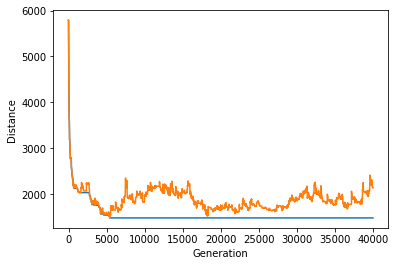

In [21]:
current_gene, best_gene = geneticAlgorithmPlot(population=cityList, popSize=10, eliteSize=3, mutationRate=0.0006, generations=40000)

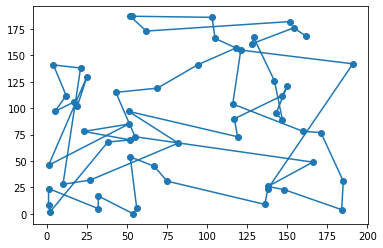

In [22]:
current_gene_array = make_cities_array(current_gene)
plt.scatter(current_gene_array[:,0],current_gene_array[:,1])
plt.plot(current_gene_array[:,0],current_gene_array[:,1])

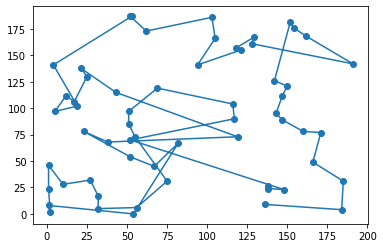

In [23]:
best_gene_array = make_cities_array(best_gene)
plt.scatter(best_gene_array[:,0],best_gene_array[:,1])
plt.plot(best_gene_array[:,0],best_gene_array[:,1])
